# Capstone Project: Predicting Outcomes of Asylum Cases

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 09-19-2022<br>
**Notebook**: 2 of 5<br>

## Overview

Every year people come to the United States seeking protection because they have suffered persecution or fear that they will suffer persecution due to their race, belief, nationality, political opinion, or being members of particular social group. These people can apply for **Asylum** once they are in the United States.

There are two types of **Asylum**:
- **Affirmative Asylum**  
    - If affirmative application is denied, the applicant goes into removal/deportation proceedings and can file for defensive Asylum. 
    - Affirmative asylum cases are overseen by USCIS (U.S. Citizenship and Immigration Services). 
    
    
- **Defensive Asylum**
    - If the immigrant without an immigration status is put into removal proceedings, they can apply for defensive asylum.
    - Defensive Asylum cases are overseen by Immigration Judges.
    
    
It’s a long and difficult journey for those who seek asylum in the unites states. Their journey doesn’t end until they have their case outcome and that’s whether it was accepted or rejected. 

In this project, we will be predicting outcomes of asylum cases to assist immigration attorneys gain better insight and change their approaches accordingly for a favorable outcome. 

Note that we will be looking at defensive asylum cases.

The data used in this project is from the U.S Department of Justice. Please see the citation below for more details. Initially the data collected from DOJ was imported into SQL Server and migrated to MySQL Workbench. The data had many tables that were joined and queried in MySQL Workbench. Once it was queried with the columns we needed, it was exported to csv for cleaning and next steps. For more details please refer to the **project report**. 

**Please Note:** This is **notebook 2 of 5** that were used to make our final conclusions.
In this notebook, we will be conducting an **Advanced Exploratory Data Analysis** to look at trends and relationships in our dataset and **preprocess our data** to prepare it for modeling.

**Project Citation**: 
U.S. Department of Justice, Executive Office for Immigration Review. EOIR Case Data (July 2019). Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-07. https://doi.org/10.3886/E120222V1

---

## Table of Contents

[1. Advanced Exploratory Data Analysis](#Advanced-Exploratory-Data-Analysis)<br>
* [1.1. Loading Data](#Loading-Data)<br>
* [1.2. Data Dictionary](#Data-Dictionary)<br>
* [1.3. Advanced EDA](#Advanced-EDA)<br>


[2. Data Wrangling](#Data-Wrangling)<br>
* [2.2. One-Hot Encoding](#One-Hot-Encoding)<br>
* [2.3. Saving the Data](#Saving-the-Data)<br>


[3. Summary](#Summary)<br>

---

# Notebook 2

# Advanced Exploratory Data Analysis and Data Wrangling

In this notebook, we will be conducting an Advanced Exploratory Data Analysis to look at trends and relationships in our dataset and preprocess our data to prepare it for modeling.

---

# Advanced Exploratory Data Analysis

## Loading Data

In this section we will import our libraries and load in our dataset. 

Note that we will be using the clean dataset that we worked on in the prior notebook however as best practice we will still do the initial checks for missing values and duplicates. 

Let's start by importing our libraries. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#setting figure size
plt.rcParams['figure.figsize'] = (10, 7)

Next, we will import in our dataset.

In [3]:
#import/read the data
df_asylum = pd.read_csv('data/asylum_dataset_clean.csv')

In [4]:
#check dataset
df_asylum.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REMOVED


Let's check our dataset's shape.

In [5]:
#get shape of dataframe
df_asylum.shape

(482844, 19)

In [6]:
#print the dataframe's shape
print(f'Our dataset has {df_asylum.shape[0]} rows and {df_asylum.shape[1]} columns.')

Our dataset has 482844 rows and 19 columns.


As confirmed by our code above, our dataset has **482,844 rows** and **19 columns**. 

Let's look at our dataset's info next.

In [7]:
#check dataset info
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482844 entries, 0 to 482843
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   IDNCASE           482844 non-null  int64 
 1   NATIONALITY       482844 non-null  object
 2   GENDER            482844 non-null  object
 3   BIRTHDATE         482844 non-null  object
 4   LANGUAGES         482844 non-null  object
 5   ALIEN_CITY        482844 non-null  object
 6   ALIEN_STATE       482844 non-null  object
 7   CASE_DESCRIPTION  482844 non-null  object
 8   DATE_OF_ENTRY     482844 non-null  object
 9   NOTICE_DATE       482844 non-null  object
 10  HEARING_DATE      482844 non-null  object
 11  HEARING_CITY      482844 non-null  object
 12  HEARING_STATE     482844 non-null  object
 13  CUSTODY           482844 non-null  object
 14  CRIMINAL_RECORD   482844 non-null  object
 15  ATTY_NBR          482844 non-null  int64 
 16  ABSENTIA          482844 non-null  obj

We provided a **Data Dictionary** in the previous notebook, however we will also include it in this notebook in case the columns need to be referred to.

#### Data Dictionary

|**Column Name**| **Description**| **Data Type** |
| :--- | :--- |:--- |
|**IDNCASE**| Index for cases - Note this is not actual case IDs | Numeric |
|**NATIONALITY**| Nationality of the applicants| Categorical |
|**GENDER**| Gender of the applicants | Categorical|
|**BIRTHDATE**| Date of birth of the applicants (month and year only). Note this will be updated to Age|Numeric|
|**LANGUAGES**| Languages the applicant speaks| Categorical |
|**ALIEN_CITY**| The city applicant is currently residing|Categorical |
|**ALIEN_STATE**| The state applicant is currently residing in | Categorical |
|**CASE_DESCRIPTION**| This is the applicant's case description|Categorical |
|**DATE_OF_ENTRY**| The date applicant entered United States| Datetime
|**NOTICE_DATE**| The date applicant received notice to appear in immigration court | Datetime
|**HEARING_DATE**| The date of case hearing at the immigration court| Datetime
|**HEARING_CITY**| The city of the immigration court for the case hearing |Categorical |
|**HEARING_STATE**|The state of the immigration court for the case hearing |Categorical |
|**CUSTODY**|Whether the applicant had ever been in custody of immigration officers (detained or not) |Categorical |
|**CRIMINAL_RECORD**| Criminal history and background of the applicants|Categorical |
|**ATTY_NBR**| Whether or not the applicant had immigration lawyer representation and the number of lawyers| Numeric|
|**ABSENTIA**| Whether or not the applicant was absent during their case hearing|Categorical |
|**IJ_CODE**|Immigration Judges' Initials | Categorical |
|**DECISION**| Whether the case was approved or rejected by the immigration judge|Categorical |

We can see that our dataset only has 2 numeric columns:
1. `IDNCASE` 
2. `ATTY_NBR`

The datatype for our 3 date columns has changed to object again after saving the csv from the prior notebook. 

Let's fix those next. 

In [8]:
#converting date column from string datatype to datetime format
df_asylum['DATE_OF_ENTRY'] = pd.to_datetime(df_asylum['DATE_OF_ENTRY'])
df_asylum['NOTICE_DATE'] = pd.to_datetime(df_asylum['NOTICE_DATE'])
df_asylum['HEARING_DATE'] = pd.to_datetime(df_asylum['HEARING_DATE'])

In [9]:
#check datatype for date columns again - after converting
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482844 entries, 0 to 482843
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   IDNCASE           482844 non-null  int64         
 1   NATIONALITY       482844 non-null  object        
 2   GENDER            482844 non-null  object        
 3   BIRTHDATE         482844 non-null  object        
 4   LANGUAGES         482844 non-null  object        
 5   ALIEN_CITY        482844 non-null  object        
 6   ALIEN_STATE       482844 non-null  object        
 7   CASE_DESCRIPTION  482844 non-null  object        
 8   DATE_OF_ENTRY     482844 non-null  datetime64[ns]
 9   NOTICE_DATE       482844 non-null  datetime64[ns]
 10  HEARING_DATE      482844 non-null  datetime64[ns]
 11  HEARING_CITY      482844 non-null  object        
 12  HEARING_STATE     482844 non-null  object        
 13  CUSTODY           482844 non-null  object        
 14  CRIM

Great, we have successfully updated all 3 date column datatype to datetime format. 

Next we will check for null values / missing values in our dataset. 

In [10]:
#check for missing values
df_asylum.isna().sum()

IDNCASE             0
NATIONALITY         0
GENDER              0
BIRTHDATE           0
LANGUAGES           0
ALIEN_CITY          0
ALIEN_STATE         0
CASE_DESCRIPTION    0
DATE_OF_ENTRY       0
NOTICE_DATE         0
HEARING_DATE        0
HEARING_CITY        0
HEARING_STATE       0
CUSTODY             0
CRIMINAL_RECORD     0
ATTY_NBR            0
ABSENTIA            0
IJ_CODE             0
DECISION            0
dtype: int64

We can confirm that there are no missing values in our dataset. 

Next we will check for duplicates in our dataset. 

In [11]:
#check for duplicates (rows)
df_asylum.duplicated().sum()

1

In [12]:
#looking at duplicated values
#set the value to false to return all duplicated values as true
duplicate_index = df_asylum.duplicated(keep=False)
df_asylum.loc[duplicate_index, :]

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
327283,5850532,COLOMBIA,M,1/1975,SPANISH,DORAL,FL,Removal,2007-04-07,2007-10-22,2008-06-05,MIAMI,FL,Never Detained,No,1,No,JDD,REMOVED
327285,5850532,COLOMBIA,M,1/1975,SPANISH,DORAL,FL,Removal,2007-04-07,2007-10-22,2008-06-05,MIAMI,FL,Never Detained,No,1,No,JDD,REMOVED


Even though we had cleaned our dataset, this duplicated row did not come up in the prior data cleaning process. 

It's a good thing we checked again as best practice whenever we load in our dataset. 

We will remove this duplicated row from our dataset next. 

In [13]:
#create a new dataframe with duplicates removed
df_asylum2 = df_asylum.drop_duplicates().copy()

In [14]:
#check dataframe has been created
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,DEPORTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,DEPORTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,DEPORTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,RELIEF/RESCINDED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REMOVED


In [15]:
#check shape
df_asylum2.shape

(482843, 19)

In [16]:
#sanity check #1
df_asylum2.shape[0]+1

482844

In [17]:
#sanity check #2 to confirm no duplicates
df_asylum2.duplicated().sum()

0

Great, we have successfully removed the duplicated row from our dataset.

We are now ready for Advanced Exploratory Data Analysis. 

---

## Advanced EDA

In this section we will be performing Advanced Exploratory Data Analysis to better understand our dataset and the trends/relationships within it. 

Our **target** column of interest is `DECISION`. 

Let's explore the values in this column.

First we will look at the number of unique values in this column.

**`DECISION`**

In [18]:
#look at number of unique values in our target column (DECISION)
df_asylum2['DECISION'].nunique()

5

There are 5 unique values in this column. Let's explore these values and look at their value counts in our dataset.

In [19]:
#look at unique values in our target column (DECISION)
df_asylum2['DECISION'].unique().tolist()

['DEPORTED', 'RELIEF/RESCINDED', 'REMOVED', 'GRANTED', 'LEGALLY ADMITTED']

There are 5 decision outcomes made my immigration judges on asylum cases in our dataset. 

1. Deported
2. Removed
3. Granted
4. Legally Admitted
5. Relief / Rescinded

For the purposes of our report, we will be grouping these decisions into two outcomes: **Accepted** or **Rejected**.

 - **Deported** and **Removed** will be grouped as **Rejected**
 
 - **Granted**, **Legally Admitted**, and **Relief/Rescinded** will be grouped as **Accepted**

Let's group these as discussed above.

In [20]:
#replace values with rejected and accepted
df_asylum2['DECISION'] = np.where((df_asylum2['DECISION'] == 'DEPORTED') | (df_asylum2['DECISION'] == 'REMOVED'), 'REJECTED', 'ACCEPTED')

Now that we have replaced these values with **ACCEPTED** and **REJECTED** we can check the value counts and class distribution again. 

In [21]:
#check values
df_asylum2['DECISION'].unique().tolist()

['REJECTED', 'ACCEPTED']

In [22]:
#check dataset
df_asylum2.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,REJECTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,REJECTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,REJECTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,ACCEPTED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REJECTED


Great, we can confirm that we have successfully updated the values in our `DECISION` column. 

Next we will look at the value counts and class distribution in our dataset. 

In [23]:
#check value counts
df_asylum2['DECISION'].value_counts()

REJECTED    423246
ACCEPTED     59597
Name: DECISION, dtype: int64

In [24]:
#check value counts percentage
df_asylum2['DECISION'].value_counts(normalize=True)

REJECTED    0.876571
ACCEPTED    0.123429
Name: DECISION, dtype: float64

As we saw before as well, we ~**88%** of asylum cases in our dataset are **rejected** and only **12%** of asylum cases are **accepted** by immigration judges. 

Let's visualize these to better understand our class distribution. 

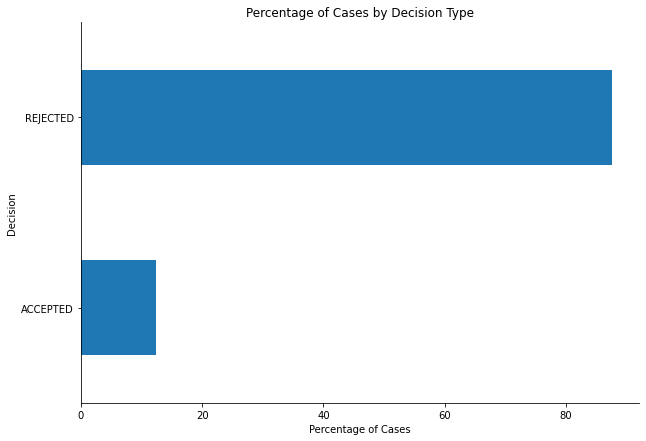

In [25]:
(df_asylum2['DECISION'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh')
plt.title('Percentage of Cases by Decision Type')
plt.xlabel('Percentage of Cases')
plt.ylabel('Decision')
sns.despine()
plt.show()

Looking at the above graph, we can see that more than 80% of the casees in our dataset are rejected. 

Let's look at the relationship between `Gender` and case decision next. 

**`GENDER` & `DECISION`**

In [26]:
#get percentage of decisions per gender
gender_pct = (df_asylum2.groupby('GENDER')['DECISION'].value_counts(normalize=True))*100
gender_pct

GENDER  DECISION
F       REJECTED    83.896864
        ACCEPTED    16.103136
M       REJECTED    88.990988
        ACCEPTED    11.009012
Name: DECISION, dtype: float64

From the calculations above, we can see that both genders have a fairly similar Acceptance and Rejection rates. 

That being said, the males have a slightly higher 'Rejected' rate at **89%** vs. females at **84%**. 

We can also see that females have a slightly higher 'Acceptance' rate at **16%** vs. males at **11%**.

Let's visualize the above to get a better understanding. 

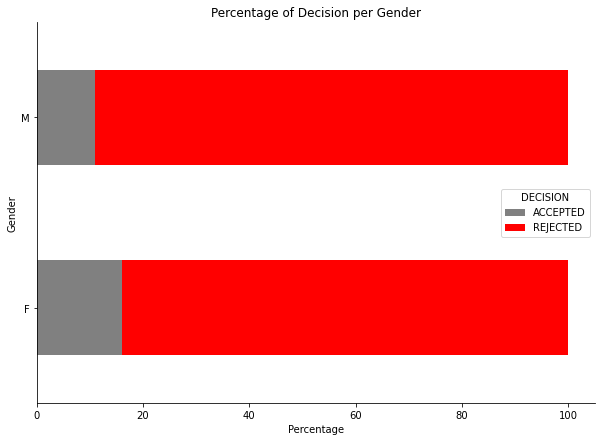

In [27]:
#plot the percentage of decision per gender
gender_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Percentage of Decision per Gender')
plt.xlabel('Percentage')
plt.ylabel('Gender')
sns.despine()
plt.show()

Looking at the above graph, we can see that females have a slightly higher acceptance rate in their asylum cases than males. 

Males have a slightly higher rejection rates in their asylum cases than females. 

Let's look at the relationship between `CASE_DESCRIPTION` and `DECISION` next.

**`CASE_DESCRIPTION` & `DECISION`**

In [28]:
#get percentage of decisions per gender
case_pct = (df_asylum2.groupby('CASE_DESCRIPTION')['DECISION'].value_counts(normalize=True))*100
case_pct

CASE_DESCRIPTION      DECISION
Asylum Only Case      REJECTED     51.797040
                      ACCEPTED     48.202960
Credible Fear Review  ACCEPTED    100.000000
Deportation           REJECTED     66.929134
                      ACCEPTED     33.070866
Reasonable Fear Case  ACCEPTED    100.000000
Removal               REJECTED     90.213292
                      ACCEPTED      9.786708
Name: DECISION, dtype: float64

From the above percentages we can see than 100% of Credible Fear Review Cases and 100% Reasonable Fear Cases in our dataset are accepted.

Let's visualize these numbers next.

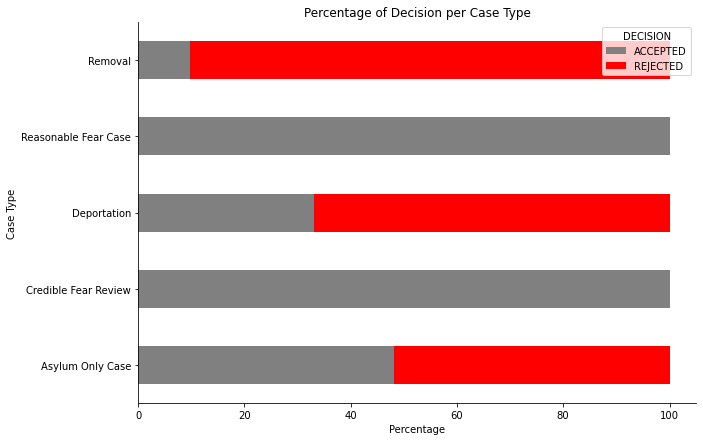

In [29]:
#plot the percentage of decision per gender
case_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Percentage of Decision per Case Type')
plt.xlabel('Percentage')
plt.ylabel('Case Type')
sns.despine()
plt.show()

This is useful insight as we can see that all cases that were Reasonable Fear Case and Credible Fear Review were approved. 

Let's look at the value counts per case type in our dataset again to see how many cases we had for each. 

In [30]:
#check the value counts for each case type
df_asylum2['CASE_DESCRIPTION'].value_counts()

Removal                 468513
Credible Fear Review      9466
Reasonable Fear Case      3883
Deportation                508
Asylum Only Case           473
Name: CASE_DESCRIPTION, dtype: int64

We can see that majority of cases in our dataset are removal cases and from the graph above we can also see that those cases do not have a high acceptance rate. Actually they have the lowest number of approval compared to all other case types. We can see that our dataset has more Credible Fear Review and Reasonable Fear Case than Deportation or Asylum Only Case. 

We can see that case type matter's in the outcomes of asylum cases.

Let's look at the relationship between `NATIONALITY` and `DECISION` next.

**`NATIONALITY` & `DECISION`**

In this section we will explore the relationship between Nationality and Decision made on asylum cases. 
Could there be an apparent relationship? Let's find out! 

Fist we will group the two and look at the value counts per top 10 nationalities. 

In [31]:
#look at value counts on decision per nationality
df_asylum2.groupby('DECISION')['NATIONALITY'].value_counts()

DECISION  NATIONALITY               
ACCEPTED  MEXICO                        11475
          EL SALVADOR                    7650
          GUATEMALA                      6235
          HONDURAS                       5710
          CHINA                          3863
                                        ...  
REJECTED  PEOPLE'S REPUBLIC OF BENIN        1
          SAO TOME AND PRINCIPE             1
          SEYCHELLES                        1
          SOLOMON ISLANDS                   1
          ST. HELENA                        1
Name: NATIONALITY, Length: 419, dtype: int64

In [32]:
#look at the percentage of accepted/rejected rate per nationality
(df_asylum2.groupby('DECISION')['NATIONALITY'].value_counts(normalize=True))*100

DECISION  NATIONALITY               
ACCEPTED  MEXICO                        19.254325
          EL SALVADOR                   12.836217
          GUATEMALA                     10.461936
          HONDURAS                       9.581019
          CHINA                          6.481870
                                          ...    
REJECTED  PEOPLE'S REPUBLIC OF BENIN     0.000236
          SAO TOME AND PRINCIPE          0.000236
          SEYCHELLES                     0.000236
          SOLOMON ISLANDS                0.000236
          ST. HELENA                     0.000236
Name: NATIONALITY, Length: 419, dtype: float64

We can see that nationalities such as **Mexico**, **El Salvador**, **Guatemala**, **Honduras**, and **China** have the top acceptance rate. This could be unrelated to nationality and due to the fact that there are more case applicants from these countries compared to others.  

Let's put the above calculations into a dataframe and query top nationalities with most acceptance and most rejection rate. 

In [33]:
#put above calculations into a dataframe to get top values
nat_df_pct = (df_asylum2.groupby('DECISION')['NATIONALITY'].value_counts(normalize=True))*100
nat_df_pct

DECISION  NATIONALITY               
ACCEPTED  MEXICO                        19.254325
          EL SALVADOR                   12.836217
          GUATEMALA                     10.461936
          HONDURAS                       9.581019
          CHINA                          6.481870
                                          ...    
REJECTED  PEOPLE'S REPUBLIC OF BENIN     0.000236
          SAO TOME AND PRINCIPE          0.000236
          SEYCHELLES                     0.000236
          SOLOMON ISLANDS                0.000236
          ST. HELENA                     0.000236
Name: NATIONALITY, Length: 419, dtype: float64

In [34]:
#query only top 5 states with most acceptance rate
nat_df_pct['ACCEPTED'].sort_values(ascending=False).head(5)

NATIONALITY
MEXICO         19.254325
EL SALVADOR    12.836217
GUATEMALA      10.461936
HONDURAS        9.581019
CHINA           6.481870
Name: NATIONALITY, dtype: float64

In [35]:
#query only top 5 states with most rejection rate
nat_df_pct['REJECTED'].sort_values(ascending=False).head(5)

NATIONALITY
MEXICO         34.291405
GUATEMALA      21.636826
HONDURAS       16.409133
EL SALVADOR    10.523195
HAITI           1.617972
Name: NATIONALITY, dtype: float64

We can see that the same nationalities that have the most acceptance rate in our dataset, also have the highest rejection rates. 

Next, we will look at the relationship between `CRIMINAL_RECORD` and `DECISION`. 

**`CRIMINAL_RECORD` & `DECISION`**

Let's look at the percentage of case decision by criminal record. 

In [36]:
#look at criminal record value counts
df_asylum2['CRIMINAL_RECORD'].value_counts()

No         406009
Yes         63032
Unknown     13802
Name: CRIMINAL_RECORD, dtype: int64

In [37]:
#look at percentage of decisions by criminal record
cr_pct = (df_asylum2.groupby('CRIMINAL_RECORD')['DECISION'].value_counts(normalize=True))*100
cr_pct

CRIMINAL_RECORD  DECISION
No               REJECTED    91.067932
                 ACCEPTED     8.932068
Unknown          ACCEPTED    98.311839
                 REJECTED     1.688161
Yes              REJECTED    84.511042
                 ACCEPTED    15.488958
Name: DECISION, dtype: float64

This is interesting, we can see that those who have a criminal record have a higher acceptance rate at **15%** vs. those with no criminal record at **9%**. 

Let's visualize the above findings. 

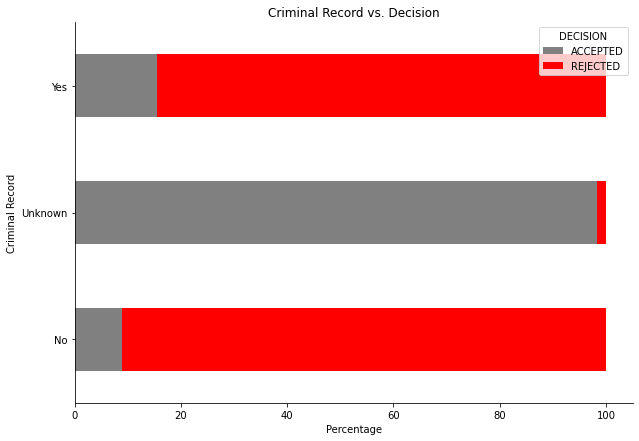

In [38]:
#plot the percentage of decision by criminal record
cr_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Criminal Record vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Criminal Record')
sns.despine()
plt.show()

Looking at the above we can see that those with a criminal record, had a higher acceptance rate. We should note that 'Unknown' values were less than 'Yes' and 'No' values. That being said, the 'Unknown' value in the criminal record, has a very high percentage of acceptance rate and a very low rejection rate.

We will look at the relationship between `CUSTODY` and `DECISION` next. 

**`CUSTODY` & `DECISION`**

In [39]:
#look at percentage of decision per custody type
custody_pct = (df_asylum2.groupby('CUSTODY')['DECISION'].value_counts(normalize=True))*100
custody_pct

CUSTODY         DECISION
Detained        REJECTED    88.128038
                ACCEPTED    11.871962
Never Detained  REJECTED    87.430397
                ACCEPTED    12.569603
Released        REJECTED    86.788210
                ACCEPTED    13.211790
Name: DECISION, dtype: float64

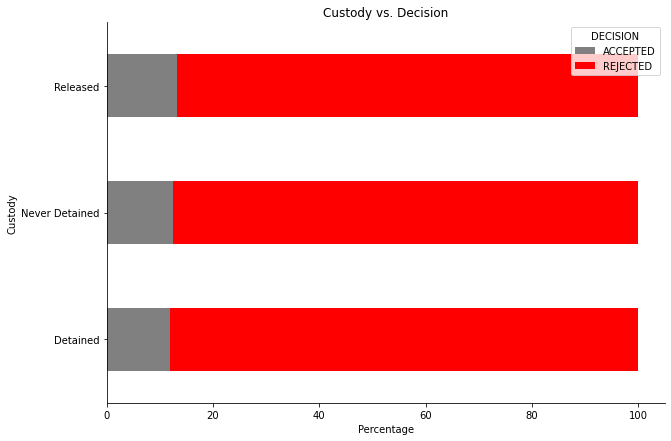

In [40]:
#plot the percentage of decision by custody
custody_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Custody vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Custody')
sns.despine()
plt.show()

Looking at the above, there does not seem to be a significant difference between the groups in `CUSTODY` column. Perhaps `CUSTODY` would not be a good predictor of Decision. 

We can do statistical testing (Chi Squared) to see if there is significant difference between custody type and decision (outcomes of asylum cases). 

`CUSTODY` column stores categorical data, and for categorical data we can use **Chi Squared Test** to make inference about the data. 

Let's do a value count per custody type as we need to use the counts for our **Chi Squared Test**. 

In [41]:
#value counts per custody type with DECISION
df_asylum2.groupby('CUSTODY')['DECISION'].value_counts()

CUSTODY         DECISION
Detained        REJECTED    188401
                ACCEPTED     25380
Never Detained  REJECTED    181196
                ACCEPTED     26050
Released        REJECTED     53649
                ACCEPTED      8167
Name: DECISION, dtype: int64

Let's setup our hypothesis. 

**Hypothesis Test**:

$H_0$: When looking at outcomes of asylum cases, there is no significant difference between different custody type. $\;\; \;\;$  
$H_1$: When looking at outcomes of asylum cases, there is significant difference between different custody type. 

In [42]:
#input above counts into a list/dictionary
custody_types = {'Detained': [188401,25380], 'Never Detained': [181196,26050],'Released': [53649,8167]}
custody_types = pd.DataFrame(custody_types, index=['Rejected', 'Accepted'])
display(custody_types)

,Detained,Never Detained,Released
Rejected,188401,181196,53649
Accepted,25380,26050,8167


In [43]:
#import stats library
from scipy import stats

#calculate chi square
stats.chi2_contingency(custody_types)

(96.80089697657516,
 9.548877015528961e-22,
 2,
 array([[187394.14908366, 181665.75991782,  54186.09099852],
        [ 26386.85091634,  25580.24008218,   7629.90900148]]))

The chi squared statistic is **96.80** and the **p-value** is **9.548877015528961e-22** which is a very very small value and much smaller than the threshold of 0.05.

since the **p-value < 0.05** we **reject the $H_0$ (null hypothesis)** and conclude that when looking at the outcomes of asylum cases, there is significant difference between different custody types (Detained, Never Detained, Releaseed). 

We can look at the relationship between the top immigration judges (`IJ_CODE`) and `DECISION` next. 

**`IJ_CODE` & `DECISION`**

Let's look at the relationship between the Immigration Judge and Decision. We do have a lot of judges in this dataset, we can only look at the top 5 judges to see if we see a relationship there. 

In [44]:
#look at the percentage of decision per immigration judge
(df_asylum2.groupby('IJ_CODE')['DECISION'].value_counts(normalize=True))*100

IJ_CODE  DECISION
AA       REJECTED     85.000000
         ACCEPTED     15.000000
AAA      REJECTED    100.000000
AAK      REJECTED     75.403226
         ACCEPTED     24.596774
                        ...    
ZZD      ACCEPTED      9.397590
ao       REJECTED     75.408719
         ACCEPTED     24.591281
cep      REJECTED    100.000000
jlr      REJECTED    100.000000
Name: DECISION, Length: 1315, dtype: float64

In [45]:
#put above calculations into a dataframe to get top values
judge_df_pct = (df_asylum2.groupby('IJ_CODE')['DECISION'].value_counts(normalize=True))*100
judge_df_pct = judge_df_pct.unstack()
judge_df_pct

DECISION,ACCEPTED,REJECTED
IJ_CODE,,
AA,15.000000,85.000000
AAA,NaN,100.000000
AAK,24.596774,75.403226
AAS,36.394558,63.605442
AAT,12.354521,87.645479
...,...,...
ZAN,9.090909,90.909091
ZZD,9.397590,90.602410
ao,24.591281,75.408719


We can see that there are some missing values, that's because if the judge had no cases accepted and 100% of the cases they decided on Rejected, there is no accepted value and therefore it is null. We will fill those in with 0.

In [46]:
#fill in NaNs with 0 
judge_df_pct = judge_df_pct.fillna(0)
judge_df_pct

DECISION,ACCEPTED,REJECTED
IJ_CODE,,
AA,15.000000,85.000000
AAA,0.000000,100.000000
AAK,24.596774,75.403226
AAS,36.394558,63.605442
AAT,12.354521,87.645479
...,...,...
ZAN,9.090909,90.909091
ZZD,9.397590,90.602410
ao,24.591281,75.408719


Now let's query the above dataframe to only see the top judges with most acceptance and top judges with most rejection rates. 

In [47]:
#query only top 5 judges with most acceptance rate
judge_df_pct['ACCEPTED'].sort_values(ascending=False).head(5)

IJ_CODE
RGS    100.000000
GPM     87.209302
SKP     79.661017
JDC     79.259259
BSL     67.647059
Name: ACCEPTED, dtype: float64

We can see that only one judge has an acceptance rate or **100%**. Let's look at the judges with the most rejection rates.

In [48]:
#query only top 5 judges with most rejection rate
judge_df_pct['REJECTED'].sort_values(ascending=False).head(5)

IJ_CODE
jlr    100.0
JDM    100.0
CLF    100.0
VJ5    100.0
RNO    100.0
Name: REJECTED, dtype: float64

All top 5 judges in terms of rejection rate, have rejected **100%** of the Asylum Cases they reviewed/oversaw. 

Next we will look at whether being absent or present at the hearing makes a difference in the decision. 

**`ABSENTIA` & `DECISION`**

In [49]:
#look at the decision percentage by Absentia
abs_pct = df_asylum2.groupby('ABSENTIA')['DECISION'].value_counts(normalize=True)*100
abs_pct

ABSENTIA  DECISION
No        REJECTED    80.845567
          ACCEPTED    19.154433
Unknown   REJECTED    80.000000
          ACCEPTED    20.000000
Yes       REJECTED    99.920542
          ACCEPTED     0.079458
Name: DECISION, dtype: float64

We can see that whether you are absent or present can make a difference in the decision as those who were absent at their asylum case hearing, **99.92%** got rejected vs. those who were present at their hearings, **81%** got rejected. 

Let's visualize the above to understand it better. 

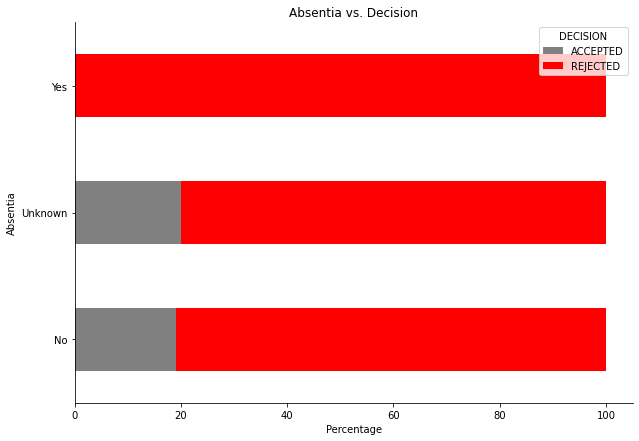

In [50]:
#plot the percentage of decision by absentia
abs_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Absentia vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Absentia')
sns.despine()
plt.show()

Looking at the above graph, we can see that ~100% of those who were absent at their hearing got their asylum case rejected by an immigration judge. 

The percentage of 'Unknonw' and 'No' is very close together and we could possibly combine both in the preprocessing step. 

Let's look at the relationship between `HEARING_STATE` and `DECISION` columns next. 

**`HEARING_STATE` & `DECISION`**

In this section we will be looking at hearing states and percentage of decision outcomes per state. 

We want to see if some states have higher rejection or acceptance rate. 

First let's group hearing state by decision outcome. 

In [51]:
#look at decision percentage (accepted/rejected) per hearing state
(df_asylum2.groupby('HEARING_STATE')['DECISION'].value_counts(normalize=True))*100

HEARING_STATE  DECISION
AK             ACCEPTED     57.692308
               REJECTED     42.307692
AL             REJECTED    100.000000
AZ             REJECTED     85.906837
               ACCEPTED     14.093163
                              ...    
VA             ACCEPTED     15.500436
VI             REJECTED     93.023256
               ACCEPTED      6.976744
WA             REJECTED     87.925588
               ACCEPTED     12.074412
Name: DECISION, Length: 81, dtype: float64

Now that we have each state grouped by the decision outcome, we can input this in a dataframe to query top states by acceptance and rejection rate. 

In [52]:
#put above calculations into a dataframe to get top values
hs_df_pct = (df_asylum2.groupby('HEARING_STATE')['DECISION'].value_counts(normalize=True))*100
hs_df_pct = hs_df_pct.unstack()
hs_df_pct

DECISION,ACCEPTED,REJECTED
HEARING_STATE,,
AK,57.692308,42.307692
AL,NaN,100.000000
AZ,14.093163,85.906837
CA,16.748239,83.251761
CO,8.854992,91.145008
CT,15.609756,84.390244
FL,13.313546,86.686454
GA,2.228063,97.771937
GU,5.759162,94.240838


We can see that some states have a **100%** rejection rate, and therefore the value for the accepted column is NaN. We can change that to **0**. 

In [53]:
#fill in NaNs with 0 
hs_df_pct = hs_df_pct.fillna(0)
hs_df_pct

DECISION,ACCEPTED,REJECTED
HEARING_STATE,,
AK,57.692308,42.307692
AL,0.000000,100.000000
AZ,14.093163,85.906837
CA,16.748239,83.251761
CO,8.854992,91.145008
CT,15.609756,84.390244
FL,13.313546,86.686454
GA,2.228063,97.771937
GU,5.759162,94.240838


Let's query the top states by acceptance rate.

In [54]:
#query only top 5 states with most acceptance rate
hs_df_pct['ACCEPTED'].sort_values(ascending=False).head(5)

HEARING_STATE
MT    61.538462
HI    60.280374
AK    57.692308
PR    41.803279
NY    21.691362
Name: ACCEPTED, dtype: float64

We can see that **Montana** has the highest acceptance rate followed by **Hawaii** and **Alaska**. This could be due to the fact that not a lot of applicants are in or near those states. As we saw previously majority of the hearings are in **Texas, Florida, and California** however they don't have high acceptance rate.

Let's query the top states by rejection rate.

In [55]:
#query only top 5 states with most rejection rate
hs_df_pct['REJECTED'].sort_values(ascending=False).head(5)

HEARING_STATE
OK    100.0
SD    100.0
ND    100.0
NH    100.0
AL    100.0
Name: REJECTED, dtype: float64

We can see that **Oklahoma, South Dakota, North Dakota, New Hampshire, and Alabama** all have a **100%** rejection rate. 

Hearing State could be a good predictor of the decision outcome. 

Next we will be looking at the relationship between `ATTY_NBR` and `DECISION` column. 

**`ATTY_NBR` & `DECISION`**

In this section we will look at the relationship between attorney number and decision outcome. 

Could having more attorneys guarantee acceptance?

First let's remind ourselves of the value counts per attorney number in our dataset.

In [56]:
#look at value count for ATTY_NBR
df_asylum2['ATTY_NBR'].value_counts()

0     451215
1      19790
2       9043
3       1613
4        845
6        146
5        120
8         33
7         19
10        12
9          3
14         1
12         1
31         1
13         1
Name: ATTY_NBR, dtype: int64

In [57]:
#look at value count in percentage for ATTY_NBR
df_asylum2['ATTY_NBR'].value_counts(normalize=True)

0     0.934496
1     0.040986
2     0.018729
3     0.003341
4     0.001750
6     0.000302
5     0.000249
8     0.000068
7     0.000039
10    0.000025
9     0.000006
14    0.000002
12    0.000002
31    0.000002
13    0.000002
Name: ATTY_NBR, dtype: float64

We can see that about **93%** of the cases in our dataset did no have an attorney representation. Only a few had more than 6 attorney representation. Let's look at the decision outcome per attorney representation number. 

In [58]:
#look at the decision percentage by attorney number
att_nbr_pct = (df_asylum2.groupby('ATTY_NBR')['DECISION'].value_counts(normalize=True))*100
att_nbr_pct

ATTY_NBR  DECISION
0         REJECTED     89.414802
          ACCEPTED     10.585198
1         REJECTED     63.335018
          ACCEPTED     36.664982
2         REJECTED     61.528254
          ACCEPTED     38.471746
3         REJECTED     57.842529
          ACCEPTED     42.157471
4         REJECTED     64.852071
          ACCEPTED     35.147929
5         REJECTED     65.000000
          ACCEPTED     35.000000
6         REJECTED     65.753425
          ACCEPTED     34.246575
7         REJECTED     57.894737
          ACCEPTED     42.105263
8         REJECTED     60.606061
          ACCEPTED     39.393939
9         ACCEPTED    100.000000
10        REJECTED     58.333333
          ACCEPTED     41.666667
12        REJECTED    100.000000
13        REJECTED    100.000000
14        ACCEPTED    100.000000
31        ACCEPTED    100.000000
Name: DECISION, dtype: float64

We can see that cases that do not have attorney representation have a higher rejection rate than the others. We should also note that **93%** cases in our dataset do not have attorney representation. So seeing higher rejection rate makes sense. 

There are some cases where the 1 case with `12` and `13` attorneys were rejected. 

But **having more attorney's does not mean higher chances of the case being accepted by the immigration judge**. 

Let's plot these to get a better idea.

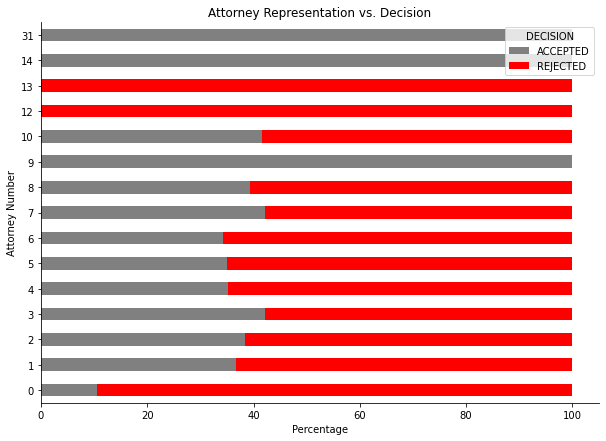

In [59]:
#plot
#plot the percentage of decision by absentia
att_nbr_pct.unstack().plot(kind = 'barh', stacked=True, color=['gray', 'red'])
plt.title('Attorney Representation vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Attorney Number')
sns.despine()
plt.show()

Looking at the above graph, we can see that those with **1-10 attorney representation** had a **higher rate of acceptance** by the immigration judge. 

We can look at the relationships and correlations. Note that `DECISION` will be our target (dependent variable), therefore we can see how strongly our numeric feature which is `ATTY_NBR` relates to `DECISION`. 

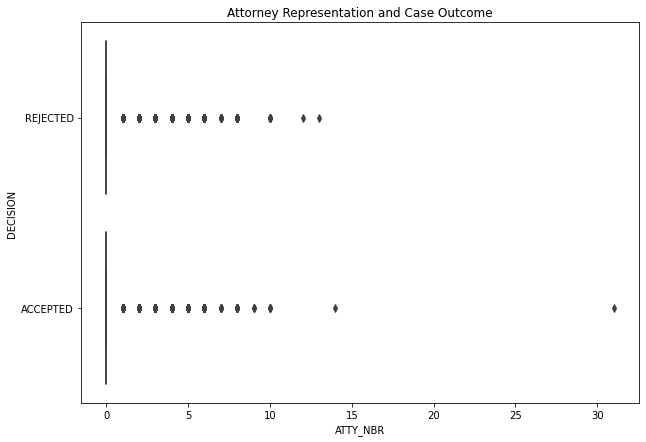

In [60]:
#boxplot to see the numeric feature with our target (DECISION)
sns.boxplot(data=df_asylum2, y='DECISION', x='ATTY_NBR')
plt.title('Attorney Representation and Case Outcome')
plt.show()

We can see that there are outliers in the `ATTY_NBR` and this can skew our results even if we scale our data. 

We can either leave this as is and run our model and evaluate or we can categorize it into binary values. If applicant had attorney representation it would be shown as 1 and if applicant did not have attorney representation then it would be shown as 0. This could be a better alternative than dropping data points with extreme outliers.

We will make this decision in our next step which is the data preprocessing/data wrangling stage.

We have done an insightful Advanced Exploratory Data Analysis on our dataset. We will now perform data wrangling and preprocessing to prepare out data for modeling. 

Note that as we convert our categorical column into numeric, we will perform additional EDA if necessary to unveil more insight. 

---

# Data Wrangling

Now that we have completed out Advanced Exploratory Data Analysis, we will preprocess our data, in particular our non-numeric columns. 

In [61]:
#make new df
df_asylum3 = df_asylum2.copy()

In [62]:
#check the data 
df_asylum3.head()

,IDNCASE,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,3293523,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,REJECTED
1,4245818,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,REJECTED
2,4245825,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,REJECTED
3,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,ACCEPTED
4,4233710,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REJECTED


In [63]:
#sanity check - print the shape
print(f'Our dataset has {df_asylum2.shape[0]} rows and {df_asylum2.shape[1]} columns.')
print(f'Our new dataset has {df_asylum3.shape[0]} rows and {df_asylum3.shape[1]} columns.')

Our dataset has 482843 rows and 19 columns.
Our new dataset has 482843 rows and 19 columns.


We can also drop the `IDNCASE` column as this is only an index from the original dataset which we queried in SQL. 

Let's drop the `IDNCASE` column next. 

In [64]:
#drop IDNCASE
df_asylum3.drop(['IDNCASE'], axis=1, inplace=True)

In [65]:
#sanity check
df_asylum3.head()

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,GUATEMALA,F,12/1971,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,REJECTED
1,ALBANIA,F,11/1968,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,REJECTED
2,ALBANIA,M,2/1990,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,REJECTED
3,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,ACCEPTED
4,ALBANIA,F,6/1961,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,REJECTED


Great, we can confirm that our new dataset is now ready for preprocessing. 

---

#### Converting our target Column of `DECISION`  into Binary Column

**`DECISION`**

First we will convert `DECISION` column which is our **target** column into a binary column. 

**ACCEPTED** will be encoded as **1** and **REJECTTED** will be encoded as 0. 

In [66]:
#convert DECISION column to a binary column - ACCEPTED will be 1 and REJECTED will be 0
df_asylum3['DECISION'] = np.where(df_asylum3['DECISION'] == 'ACCEPTED', 1, 0)

In [67]:
#sanity check #1
df_asylum3[['DECISION']]

,DECISION
0,0
1,0
2,0
3,1
4,0
...,...
482839,1
482840,0
482841,1
482842,1


In [68]:
#sanity check #2 - to make sure DECISION column has been updated in our dataframe
df_asylum3.sample(5)

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
73441,EL SALVADOR,M,7/1994,SPANISH,MIAMI,FL,Removal,2016-04-21,2017-10-31,2018-01-09,MIAMI,FL,Detained,Yes,0,No,JO,0
438325,EGYPT,M,1/1967,ENGLISH,KEARNY,NJ,Removal,1999-02-13,2010-01-13,2010-01-21,NEWARK,NJ,Detained,Yes,0,No,MRR,0
450533,MEXICO,M,2/1951,ENGLISH,LOS FRESNOS,TX,Removal,1956-10-26,2013-04-07,2013-05-01,LOS FRESNOS,TX,Detained,Yes,1,No,KHU,1
146513,MEXICO,M,11/1996,SPANISH,HARRISBURG,PA,Removal,2014-01-30,2015-08-11,2015-10-08,PHILADELPHIA,PA,Released,No,0,Yes,SAM,0
304679,NICARAGUA,M,11/1996,SPANISH,PHOENIX,AZ,Removal,2017-09-19,2017-10-17,2018-02-06,PHOENIX,AZ,Released,No,0,Yes,JWR,0


We have successfully updated our (**target**) `DECISION` column into a binary column. 

Let's look at the percentage distribution and visualize it. 

In [69]:
#calculate DECISION percentage in our dataset once again
(df_asylum3['DECISION'].value_counts(normalize=True))*100

0    87.657065
1    12.342935
Name: DECISION, dtype: float64

This is another way to sanity check after the column conversion into binary as we can confirm that we have kept the same class distribution. 

Let's visualize the above information. 

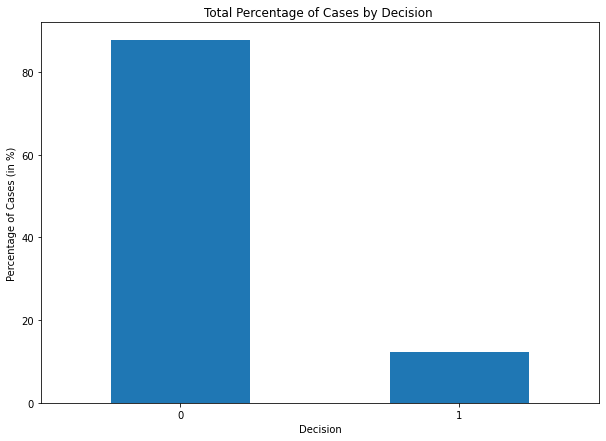

In [70]:
#visualize the distribution
plt.figure()
(df_asylum3['DECISION'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Total Percentage of Cases by Decision ')
plt.xlabel('Decision')
plt.ylabel('Percentage of Cases (in %)')
plt.xticks(rotation=0)
plt.show()

Note that we have a highly imbalanced class distribution. 

We can see that majority of the cases in our dataset have a decision outcome of **0** meaning **Rejected**. Only a small percentage of cases in our dataset have the decision outcome of **1** meaning **Accepted**. 

Once we get into further steps in our report we can fix this by either **Upsampling** or **Downsampling** or using the **SMOTE** method. More on that in the next notebook. 

Next we will convert other non-numerci column in our dataset into numeric. 

---

#### Converting Non-Numeric Columns into Numeric

In this section we will be preprocessing and transforming out non-numeric columns to numeric. We will combine these along with out numeric columns into a clean dataset to perform our modeling on. 

In order to do so, we will start with our numeric columns and add them to a clean dataset first. 

In [71]:
#seperate numeric columns
numeric_col_list = list(df_asylum3.select_dtypes('number').columns)
print(numeric_col_list)

['ATTY_NBR', 'DECISION']


There are 2 numeric columns in our dataset and we explored both previously in our basic EDA and advanced EDA. 

Let's look at our non-numeric columns. 

In [72]:
#seperate categorical/non-numeric columns
non_numeric_col_list = list(df_asylum3.select_dtypes('object').columns)
print(non_numeric_col_list)

['NATIONALITY', 'GENDER', 'BIRTHDATE', 'LANGUAGES', 'ALIEN_CITY', 'ALIEN_STATE', 'CASE_DESCRIPTION', 'HEARING_CITY', 'HEARING_STATE', 'CUSTODY', 'CRIMINAL_RECORD', 'ABSENTIA', 'IJ_CODE']


In [73]:
dt_col_list = list(df_asylum3.select_dtypes('datetime').columns)
print(dt_col_list)

['DATE_OF_ENTRY', 'NOTICE_DATE', 'HEARING_DATE']


There are **13** non-numeric / categorical columns as well as **3** datetime columns in our dataset. 

Note that `DATE_OF_ENTRY`, `NOTICE_DATE`, and `HEARING_DATE` are also considered non-numeric that need to be transformed. Since these were updated to datetime format, they aren't showing up in the 'number' or 'object' columns. 

Next we will preprocess all of the datetime columns and `BIRTHDATE` column. The rest of the non-numeric columns can be transformed via column transformer with One-Hot Encoding. More on that in the later section of this notebook. 

Great, now we can get started and preprocess all our non-numeric columns. 

Let's look at the columns and need to be converted. 

**Non-Numeric Columns to Convert:**

- `NATIONALITY`
- `GENDER` 
- `BIRTHDATE` 
- `LANGUAGES`
- `ALIEN_CITY`
- `ALIEN_STATE` 
- `CASE_DESCRIPTION` 
- `HEARING_CITY`
- `HEARING_STATE` 
- `CUSTODY` 
- `CRIMINAL_RECORD` 
- `ABSENTIA` 
- `IJ_CODE`

Let's look at the number of unique values in each categorical column.

In [74]:
#look at unique values in each categorical column
df_asylum3[non_numeric_col_list].nunique().sort_values()

GENDER                  2
CUSTODY                 3
CRIMINAL_RECORD         3
ABSENTIA                3
CASE_DESCRIPTION        5
HEARING_STATE          43
ALIEN_STATE            57
HEARING_CITY          125
NATIONALITY           220
LANGUAGES             304
IJ_CODE               698
BIRTHDATE            1102
ALIEN_CITY          12173
dtype: int64

What are the columns that we want to preprocess and turn numeric prior to modeling?

`ALIEN_CITY` and `HEARING_CITY` might not be needed or good predictors. Using `ALIEN_STATE` and `HEARING_STATE` will probably be more beneficial, therefore we can drop `ALIEN_CITY` and `HEARING_CITY`. Also note that `ALIEN_CITY` and `ALIEN_STATE` would be collinear as the city value depends on the state value. Similarly there is collineatiry between `HEAIRNG_CITY` and `HEARING_STATE` as the city value depends on the state value. 

Also `LANGUAGES` doesn't need to be converted as `NATIONALITIES` correlates with the language that is spoken by the applicant. Note that there are 304 unique languages in our dataset. 

**Other options for the above 3 columns would be:**
- to only include top 5 values, for example we could encode top 5 `Languages` and group the rest as 'other'. That being said since columns such as `HEARING_CITY` and `ALIEN_CITY` can be grouped into **STATE** and we already have a column for **STATE**, we can drop those. `LANGUAGES` column is similar as mentioned before since `NATIONALITIES` would correlate with the language/languages spoken by the applicant. 

We can use One-Hot Encoding to convert these non-numeric columns into numeric. 

We will be converting the below columns to numeric:

- `NATIONALITY`
- `GENDER` 
- `BIRTHDATE` 
- `ALIEN_STATE` 
- `CASE_DESCRIPTION` 
- `HEARING_STATE` 
- `CUSTODY` 
- `CRIMINAL_RECORD` 
- `ABSENTIA` 
- `IJ_CODE`

Let's look at some the columns above before using One-Hot Encoder. 

**`GENDER`**

First we will check the unique values in this column. This is for our sanity check prior to converting the column into a binary / numeric column. 

In [75]:
#look at the unique values in GENDER column
df_asylum3['GENDER'].unique()

array(['F', 'M'], dtype=object)

We have 2 unique values of **Female** and **Male** in this column. Later we will use One-Hot Encoding to transform these columns into numeric columns. To have a better label for these, let's update **F** to Female amd **M** to Male. 

In [76]:
#update GENDER column - F to female and M to male
df_asylum3['GENDER'] = np.where(df_asylum3['GENDER'] == 'F', 'Female', 'Male')

In [77]:
#sanity check #1
df_asylum3[['GENDER']]

,GENDER
0,Female
1,Female
2,Male
3,Female
4,Female
...,...
482839,Male
482840,Female
482841,Female
482842,Female


In [78]:
#sanity check #2
df_asylum3.sample(5)

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
157587,GUATEMALA,Female,8/1992,SPANISH,FRIONA,TX,Removal,2015-04-08,2015-04-08,2015-07-02,DALLAS,TX,Never Detained,No,0,Yes,RWK,0
364550,GUATEMALA,Female,3/1994,SPANISH,SHELBYVILLE,TN,Removal,2015-09-29,2015-10-01,2016-12-06,MEMPHIS,TN,Never Detained,No,0,Yes,CEP,0
139206,MEXICO,Male,4/1982,SPANISH,PANAMA CITY,FL,Removal,2010-10-17,2012-04-27,2012-11-14,ORLANDO,FL,Released,No,1,No,JG,0
440673,MEXICO,Male,8/1993,ENGLISH,ORANGE,CA,Removal,2015-03-17,2016-09-25,2017-05-01,LOS ANGELES,CA,Detained,No,0,No,NNA,0
236218,MEXICO,Male,1/1999,SPANISH,FLORENCE,AZ,Removal,2017-11-19,2017-11-28,2018-03-27,FLORENCE,AZ,Detained,Yes,0,No,MSF,0


We have successfully updated the `GENDER` column.

Next, we will convert `BIRTHDATE` column into a numeric column. 

**`BIRTHDATE` - Feature Engineering**

The `BIRTHDATE` column datatype is currently an object. We need to extract the month and year from this column and also calculate the **Age** of the applicants. 

First, we will convert the `BIRTHDATE` column into datetime and extract month and year to create two new columns of `BIRTHDATE_MONTH` and `BIRTHDATE_YEAR`. 

Second, we will feature engineer a new column called `AGE` by calculating the **Age** of the applicants from the `BIRTHDATE` column. 

The age of the applicants will be calculated up until their hearing date since we are looking at what was their age at the time of their hearing which is when the case decision is made.

In [79]:
#check column datatype
df_asylum3['BIRTHDATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482843 entries, 0 to 482843
Series name: BIRTHDATE
Non-Null Count   Dtype 
--------------   ----- 
482843 non-null  object
dtypes: object(1)
memory usage: 7.4+ MB


Let's convert the `BIRTHDATE` column to dateatime first and then seperate the month and year from the `BIRTHDATE` column to create two new columns of `BIRTHDATE_MONTH` and `BIRTHDATE_YEAR`, then we will convert the columns into integers.

In [80]:
#convert BIRTHDATE column from object to datetime format
df_asylum3['BIRTHDATE'] = pd.to_datetime(df_asylum3['BIRTHDATE'])

In [81]:
#sanity check #1 - check column datatype after updating
df_asylum3['BIRTHDATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482843 entries, 0 to 482843
Series name: BIRTHDATE
Non-Null Count   Dtype         
--------------   -----         
482843 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 MB


In [82]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION
0,GUATEMALA,Female,1971-12-01,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,0
1,ALBANIA,Female,1968-11-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,0
2,ALBANIA,Male,1990-02-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,0
3,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,1
4,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,0


We have updated the `BIRTHDATE` column into datetime format. Note that since we didn't have a day for this column for privacy reasons in our dataset, the datetime converting has added **01** as the day. We don't need to worry about this as we will not be using the day at all. We just want the month and year and we will get the age from the `BIRTHDATE` column. 

In [83]:
#seperate month from the BIRTHDATE column
df_asylum3['BIRTHDATE_MONTH'] = df_asylum3['BIRTHDATE'].dt.month

In [84]:
#check data
df_asylum3[['BIRTHDATE_MONTH']]

,BIRTHDATE_MONTH
0,12
1,11
2,2
3,6
4,6
...,...
482839,7
482840,12
482841,3
482842,11


In [85]:
#seperate year from the BIRTHDATE column
df_asylum3['BIRTHDATE_YEAR'] = df_asylum3['BIRTHDATE'].dt.year

In [86]:
#check data
df_asylum3[['BIRTHDATE_YEAR']]

,BIRTHDATE_YEAR
0,1971
1,1968
2,1990
3,1961
4,1961
...,...
482839,1988
482840,1986
482841,1993
482842,1996


Let's check the minimum and maximum `BIRTHDATE_YEAR` by looking at the statistical summary. 

In [87]:
#check statistical summary - mean, min and max
df_asylum3['BIRTHDATE_YEAR'].describe()

count    482843.000000
mean       1987.276148
std          13.772317
min        1900.000000
25%        1978.000000
50%        1987.000000
75%        1997.000000
max        2049.000000
Name: BIRTHDATE_YEAR, dtype: float64

We can see that there are some clerical errors in the `BIRTHDATE_YEAR` column that we didn't catch in the cleaning step. 

That's okay as we can now either try to impute them or drop them. This is part of the process when working with data and it is still great that we caught these. 

Let's look at the options we have:

1. feature engineer `AGE` columns first, drop the `BIRTHDATE_YEAR` column (to avoid multicollinearity) and **IMPUTE** or **DROP** the negative values

2. **IMPUTE** or **DROP** prior to feature engineering

We will go with with **option 1**. We will feature engineer `AGE` first, drop `BIRTHDATE_YEAR` column (to avoid multicollinearity), and then decide on how we will handle these negative values in `AGE`.

Let's check our dataset after these updates prior to making our new column called `AGE`.

In [88]:
#sanity check - check dataset
df_asylum3.head()

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,BIRTHDATE_YEAR
0,GUATEMALA,Female,1971-12-01,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,0,12,1971
1,ALBANIA,Female,1968-11-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,0,11,1968
2,ALBANIA,Male,1990-02-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,0,2,1990
3,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,1,6,1961
4,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,0,6,1961


Now we will make a new column called `AGE` from the `BIRTHDATE` column. 

In order to do so, we will need to calculate the age of the applicants on their hearing date. This information can be taken from the `HEARING_DATE` column. 

Let's make our new `AGE` column next. 

In [89]:
#make new column 'AGE'
df_asylum3['AGE'] = ((df_asylum3['HEARING_DATE'] - df_asylum3['BIRTHDATE']) / np.timedelta64(1, 'Y')).astype(int)

In [90]:
#check to make sure age column has been made
df_asylum3[['AGE']]

,AGE
0,23
1,34
2,13
3,43
4,40
...,...
482839,29
482840,32
482841,25
482842,20


In [91]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,BIRTHDATE,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,...,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,BIRTHDATE_YEAR,AGE
0,GUATEMALA,Female,1971-12-01,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,...,TX,Never Detained,No,0,Yes,VJ2,0,12,1971,23
1,ALBANIA,Female,1968-11-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,...,PA,Released,No,4,No,CMH,0,11,1968,34
2,ALBANIA,Male,1990-02-01,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,...,PA,Released,No,1,No,CMH,0,2,1990,13
3,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,...,PA,Released,No,2,No,RPM,1,6,1961,43
4,ALBANIA,Female,1961-06-01,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,...,PA,Released,No,2,No,RPM,0,6,1961,40


Now we can drop the `BIRTHDATE` column as we have featured engineered `AGE` from it and extracted month and year as well. 

In [92]:
#drop BIRTHDATE
df_asylum3.drop(['BIRTHDATE'], axis=1, inplace=True)

Thinking ahead for modeling, as we will be doing some modeling with a linear classifier, we will drop the `BIRTHDATE_YEAR` to avoid multicollinearity. 

In [93]:
#drop BIRTHDATE_YEAR
df_asylum3.drop(['BIRTHDATE_YEAR'], axis=1, inplace=True)

In [94]:
#check
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,0,12,23
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,0,11,34
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,0,2,13
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,1,6,43
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,0,6,40


Reminder that we need to fix the negative values for `AGE` column due to clerical errors.

As discussed above, max date of birth in our dataset was **2049** which is incorrect and it would casue negative age value in the `AGE` column. 

Let's explore and see how many negative values are in the `AGE` column and decide on how to handle these.

In [95]:
#check min and max for age column
df_asylum3['AGE'].describe()

count    482843.000000
mean         27.630874
std          13.228160
min         -49.000000
25%          18.000000
50%          27.000000
75%          36.000000
max         118.000000
Name: AGE, dtype: float64

As expected we see negative value in the statistical summary above. We will now look to see how many rows have these negative values. 

In [96]:
#calculate number of rows where `AGE` is less than or equal to 0
(df_asylum3['AGE'] <= 0).value_counts()

False    481047
True       1796
Name: AGE, dtype: int64

There are 1796 rows with negative values as `AGE`. Let's query these and make sure.

In [97]:
#query data where `AGE` is less than or equal to 0
df_asylum3[
    df_asylum3['AGE'] <= 0
]

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE
25,ARMENIA,Female,ARMENIAN,N. HOLLYWOOD,CA,Removal,1998-06-04,1999-12-14,2000-02-10,LOS ANGELES,CA,Never Detained,No,4,Yes,SLS,0,3,-35
37,ARMENIA,Female,ARMENIAN,NO. HOLLYWOOD,CA,Removal,1999-10-13,2000-11-30,2005-06-08,LOS ANGELES,CA,Never Detained,No,3,No,JDL,1,6,-39
58,BULGARIA,Male,BULGARIAN,ONTARIO,CA,Removal,1996-03-21,1999-10-04,2000-09-26,LOS ANGELES,CA,Never Detained,No,2,No,JDL,0,8,-45
59,BULGARIA,Female,BULGARIAN,ONTARIO,CA,Removal,1998-08-04,1999-10-04,2000-09-27,LOS ANGELES,CA,Never Detained,No,2,No,JDL,0,12,-49
147,COSTA RICA,Male,ENGLISH,PHILADELPHIA,PA,Removal,1997-09-07,1999-03-19,1999-08-10,NEWARK,NJ,Released,No,0,Yes,ASG,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482384,GUATEMALA,Male,"KONJOBAL, WESTERN (AKATEKO)",Fort Myers,FL,Removal,2018-05-25,2018-10-13,2018-12-05,MIAMI,FL,Never Detained,No,0,Yes,MGM,0,1,0
482394,GUATEMALA,Female,"KONJOBAL, WESTERN (AKATEKO)",LAKE WORTH,FL,Removal,2013-11-13,2015-05-25,2015-06-22,MIAMI,FL,Never Detained,No,0,No,JDD,0,3,0
482442,GUATEMALA,Male,"KONJOBAL, WESTERN (AKATEKO)",FORT MYERS,FL,Removal,2016-11-30,2016-12-03,2017-08-01,MIAMI,FL,Never Detained,No,0,No,MWA,0,9,0
482470,GUATEMALA,Female,"KONJOBAL, WESTERN (AKATEKO)",LAKE WORTH,FL,Removal,2015-07-18,2015-07-19,2015-12-23,MIAMI,FL,Released,No,0,No,MGM,0,7,0


We need to decide how to impute these incorrect `AGE` values. We can impute them with the mean age in our dataset or drop them. As we noted in the cleaning stage as well, every time we impute missing values or incorrect values in our dataset, we are introducing bias into the dataset. 

Let's look at the mean, median and mode for the `AGE` column to help us make our decision.

In [98]:
#look at mean for `AGE` column
df_asylum3['AGE'].mean()

27.63087380370017

In [99]:
#look at mode for `AGE` column
df_asylum3['AGE'].mode()

0    18
Name: AGE, dtype: int64

In [100]:
#look at median for `AGE` column
df_asylum3['AGE'].median()

27.0

Mean (average value) and median (middle value) in our `AGE` column are **27**. 

Note that we will be intorducing bias into our dataset, however it will be better than dropping all these rows, therefore will impute the incorrect `AGE` values with **27**.

In [101]:
#replace the negative age values with '27'
df_asylum3['AGE'] = np.where((df_asylum3['AGE'] <= 0), 27, df_asylum3['AGE'])

In [102]:
#sanity check - check `AGE` column
df_asylum3[['AGE']]

,AGE
0,23
1,34
2,13
3,43
4,40
...,...
482839,29
482840,32
482841,25
482842,20


Now that we have imputed the incorrect values, let's look at the statistical summary again. 

In [103]:
#check statistical summary
df_asylum3['AGE'].describe()

count    482843.000000
mean         27.733771
std          13.111238
min           1.000000
25%          18.000000
50%          27.000000
75%          36.000000
max         118.000000
Name: AGE, dtype: float64

Great, we have fixed the negative values in our `AGE` column. Please note that the maximum age shown in the above statistical summary is **118** and this is again could be due to clerical error. We could drop these values or keep them in our dataset. 

Some older applicants (above 80) could be seeking asylum with other family members and they are all applicants in this case. However above the age of 90 could be an error in the data entry. Specially values above 100 seem very unlikely. 

Let's query our `AGE` column to see how many rows are equal or above 90.

In [104]:
#query `AGE` column where age is more than or equal to 90
df_asylum3[
    df_asylum3['AGE'] >= 90
]

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE
2256,IRAQ,Male,ARABIC,STERLING HTS,MI,Removal,2014-10-28,2017-12-14,2018-07-16,DETROIT,MI,Never Detained,No,0,Yes,JMG,0,7,91
60836,COLOMBIA,Male,SPANISH,AZUSA,CA,Removal,2017-06-03,2018-08-02,2018-10-11,LOS ANGELES,CA,Never Detained,No,0,Yes,VSV,0,12,104
98801,MEXICO,Female,SPANISH,TRACY,CA,Removal,2014-10-09,2014-10-09,2015-06-05,SAN DIEGO,CA,Never Detained,No,0,Yes,RLR,0,10,98
99496,MEXICO,Male,SPANISH,LAS VEGAS,NV,Removal,2014-10-14,2014-10-16,2015-07-21,SAN DIEGO,CA,Never Detained,No,0,Yes,IPF,0,4,90
142424,GUATEMALA,Female,SPANISH,LOS ANGELES,CA,Removal,2018-04-14,2018-05-03,2018-05-23,ADELANTO,CA,Released,No,0,No,MB2,0,1,117
148542,GUATEMALA,Male,SPANISH,MONROE,MI,Credible Fear Review,2015-09-02,2015-10-09,2015-10-28,DETROIT,MI,Detained,Unknown,0,No,MKN,1,4,115
274230,EL SALVADOR,Male,SPANISH,Huntsville,TX,Removal,2001-07-19,2017-05-12,2017-09-05,HUNTSVILLE,TX,Detained,Yes,0,No,MIO,0,9,96
303351,MEXICO,Male,SPANISH,PHOENIX,AZ,Removal,2011-06-13,2012-12-22,2016-10-06,PHOENIX,AZ,Released,No,0,No,REC,0,3,99
384351,IRAQ,Female,ASSYRIAN,DES PLAINES,IL,Removal,2013-07-17,2016-11-30,2017-07-11,CHICAGO,IL,Never Detained,No,0,Yes,JLG,0,7,90
390226,AZERBAIJAN,Female,UNKNOWN LANGUAGE,Glendale,CA,Removal,2013-07-27,2015-02-05,2015-10-07,LOS ANGELES,CA,Never Detained,No,0,Yes,JDL,0,11,91


There are 14 rows total that have values higher than 90 for the `AGE` column. We will drop these values as they are highly unlikely and we don't want to impute them with mean or median in this case. 

In [105]:
#drop 14 rows with age higher or equal to 90 - mostly due to clerical error in data entry
df_asylum3.drop(df_asylum3[df_asylum3['AGE'] >= 90].index, inplace=True)

Let's check the stat summary once again to make sure we have fixed the issue. 

In [106]:
#check stat summary
#check statistical summary
df_asylum3['AGE'].describe()

count    482829.00000
mean         27.73170
std          13.10568
min           1.00000
25%          18.00000
50%          27.00000
75%          36.00000
max          89.00000
Name: AGE, dtype: float64

Now we can explore to see the relationship between `BIRTHDATE_MONTH` and `DECISION`. 

In [107]:
#look at percentage of decisions by criminal record
BM_pct = (df_asylum3.groupby('BIRTHDATE_MONTH')['DECISION'].value_counts(normalize=True))*100
BM_pct

BIRTHDATE_MONTH  DECISION
1                0           86.971910
                 1           13.028090
2                0           87.750846
                 1           12.249154
3                0           87.876546
                 1           12.123454
4                0           87.749597
                 1           12.250403
5                0           87.949276
                 1           12.050724
6                0           87.729486
                 1           12.270514
7                0           87.615628
                 1           12.384372
8                0           87.674696
                 1           12.325304
9                0           87.617865
                 1           12.382135
10               0           87.412453
                 1           12.587547
11               0           87.657088
                 1           12.342912
12               0           87.974224
                 1           12.025776
Name: DECISION, dtype: float64

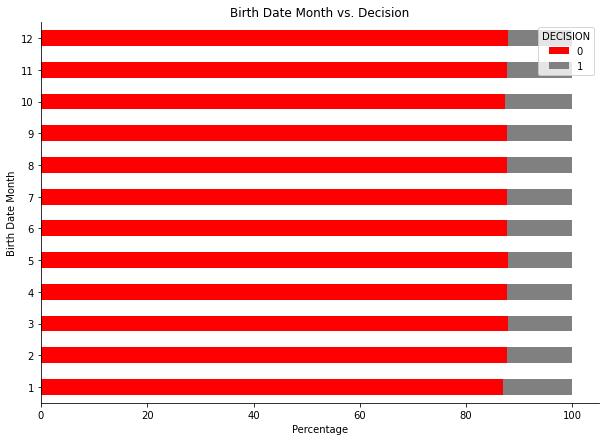

In [108]:
#plot the percentage of decision by absentia
BM_pct.unstack().plot(kind = 'barh', stacked=True, color=['red', 'gray'])
plt.title('Birth Date Month vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Birth Date Month')
sns.despine()
plt.show()

Looking at the above, we can see that there aren't any significant difference in Birth Date months and decision outcome. Note that **0** indicates REJECTED and **1** indicates ACCEPTED. 

Next we will extract day, month and year for `DATE_OF_ENTRY`. 

**`DATE_OF_ENTRY`**

In this section, we will extrant Day, Month and Year from `DATE_OF_ENTRY` column to turn it from datetime column into 3 numeric columns. 

In [109]:
#check column info
df_asylum3['DATE_OF_ENTRY'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482829 entries, 0 to 482843
Series name: DATE_OF_ENTRY
Non-Null Count   Dtype         
--------------   -----         
482829 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 MB


As this is a datetime format column, we can extract Day, Month and Year from it and create 3 numeric columns of: 
- `DATE_OF_ENTRY_DAY`
- `DATE_OF_ENTRY_MONTH`
- `DATE_OF_ENTRY_YEAR`

In [110]:
#extract day from date of entry
df_asylum3['DATE_OF_ENTRY_DAY'] = df_asylum3['DATE_OF_ENTRY'].dt.day

In [111]:
#sanity check #1
df_asylum3[['DATE_OF_ENTRY_DAY']]

,DATE_OF_ENTRY_DAY
0,1
1,8
2,8
3,6
4,6
...,...
482839,17
482840,21
482841,8
482842,9


In [112]:
#sanith check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,TX,Never Detained,No,0,Yes,VJ2,0,12,23,1
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,4,No,CMH,0,11,34,8
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,PA,Released,No,1,No,CMH,0,2,13,8
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,PA,Released,No,2,No,RPM,1,6,43,6
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,PA,Released,No,2,No,RPM,0,6,40,6


Now we can do the same steps to extract months from this column. 

In [113]:
#extract month from date of entry
df_asylum3['DATE_OF_ENTRY_MONTH'] = df_asylum3['DATE_OF_ENTRY'].dt.month

In [114]:
#sanity check #1
df_asylum3[['DATE_OF_ENTRY_MONTH']]

,DATE_OF_ENTRY_MONTH
0,3
1,12
2,12
3,11
4,11
...,...
482839,12
482840,10
482841,9
482842,1


In [115]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,...,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,...,Never Detained,No,0,Yes,VJ2,0,12,23,1,3
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,...,Released,No,4,No,CMH,0,11,34,8,12
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,...,Released,No,1,No,CMH,0,2,13,8,12
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,...,Released,No,2,No,RPM,1,6,43,6,11
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,...,Released,No,2,No,RPM,0,6,40,6,11


Similar to Day and Month, we will extract year next.

In [116]:
#extract year from date of entry
df_asylum3['DATE_OF_ENTRY_YEAR'] = df_asylum3['DATE_OF_ENTRY'].dt.year

In [117]:
#sanity check #1
df_asylum3[['DATE_OF_ENTRY_YEAR']]

,DATE_OF_ENTRY_YEAR
0,1994
1,2001
2,2001
3,2000
4,2000
...,...
482839,2014
482840,2013
482841,2016
482842,2016


In [118]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,DATE_OF_ENTRY,NOTICE_DATE,HEARING_DATE,HEARING_CITY,...,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-03-01,1994-07-21,1994-12-14,EL PASO,...,No,0,Yes,VJ2,0,12,23,1,3,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,...,No,4,No,CMH,0,11,34,8,12,2001
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2001-12-08,2003-03-19,PHILADELPHIA,...,No,1,No,CMH,0,2,13,8,12,2001
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2005-01-13,PHILADELPHIA,...,No,2,No,RPM,1,6,43,6,11,2000
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2000-11-06,2001-08-17,2002-02-26,PHILADELPHIA,...,No,2,No,RPM,0,6,40,6,11,2000


Let's look at the range of the entry dates in our dataset once more. 

In [119]:
#check min and max in entry date (get datge range)
entry_date_range = str(df_asylum3['DATE_OF_ENTRY_YEAR'].min()) + ' to ' +str(df_asylum3['DATE_OF_ENTRY_YEAR'].max())
entry_date_range

'1898 to 2019'

Great, now that we have extracted Year, Month and Day from DATE_OF_ENTRY column, we can drop it. 

In [120]:
#drop DATE_OF_ENTRY
df_asylum3.drop(['DATE_OF_ENTRY'], axis=1, inplace=True)

In [121]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,...,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-07-21,1994-12-14,EL PASO,TX,...,No,0,Yes,VJ2,0,12,23,1,3,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,No,4,No,CMH,0,11,34,8,12,2001
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,No,1,No,CMH,0,2,13,8,12,2001
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2005-01-13,PHILADELPHIA,PA,...,No,2,No,RPM,1,6,43,6,11,2000
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2002-02-26,PHILADELPHIA,PA,...,No,2,No,RPM,0,6,40,6,11,2000


Next, we will convert `NOTICE_DATE` to numeric columns similar to the `DATE_OF_ENTRY` column.

**`NOTICE_DATE`**

In this section, we will extrant Day, Month and Year from `NOTICE_DATE` column to turn it from datetime column into 3 numeric columns.

In [122]:
#get column info
df_asylum3['NOTICE_DATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482829 entries, 0 to 482843
Series name: NOTICE_DATE
Non-Null Count   Dtype         
--------------   -----         
482829 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 MB


As this is a datetime format column, we can extract Day, Month and Year from it and create 3 numeric columns of: 
- `NOTICE_DATE_DAY`
- `NOTICE_DATE_MONTH`
- `NOTICE_DATE_YEAR`

In [123]:
#extract day from notice date
df_asylum3['NOTICE_DATE_DAY'] = df_asylum3['NOTICE_DATE'].dt.day

In [124]:
#sanity check #1
df_asylum3[['NOTICE_DATE_DAY']]

,NOTICE_DATE_DAY
0,21
1,8
2,8
3,17
4,17
...,...
482839,3
482840,17
482841,9
482842,30


In [125]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,...,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-07-21,1994-12-14,EL PASO,TX,...,0,Yes,VJ2,0,12,23,1,3,1994,21
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,4,No,CMH,0,11,34,8,12,2001,8
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,1,No,CMH,0,2,13,8,12,2001,8
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2005-01-13,PHILADELPHIA,PA,...,2,No,RPM,1,6,43,6,11,2000,17
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2002-02-26,PHILADELPHIA,PA,...,2,No,RPM,0,6,40,6,11,2000,17


In [126]:
#extract month from notice date
df_asylum3['NOTICE_DATE_MONTH'] = df_asylum3['NOTICE_DATE'].dt.month

In [127]:
#sanity check #1
df_asylum3[['NOTICE_DATE_MONTH']]

,NOTICE_DATE_MONTH
0,7
1,12
2,12
3,8
4,8
...,...
482839,11
482840,5
482841,9
482842,1


In [128]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,...,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-07-21,1994-12-14,EL PASO,TX,...,Yes,VJ2,0,12,23,1,3,1994,21,7
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,No,CMH,0,11,34,8,12,2001,8,12
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,No,CMH,0,2,13,8,12,2001,8,12
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2005-01-13,PHILADELPHIA,PA,...,No,RPM,1,6,43,6,11,2000,17,8
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2002-02-26,PHILADELPHIA,PA,...,No,RPM,0,6,40,6,11,2000,17,8


In [129]:
#extract year from notice date
df_asylum3['NOTICE_DATE_YEAR'] = df_asylum3['NOTICE_DATE'].dt.year

In [130]:
#sanity check #1
df_asylum3[['NOTICE_DATE_YEAR']]

,NOTICE_DATE_YEAR
0,1994
1,2001
2,2001
3,2001
4,2001
...,...
482839,2017
482840,2019
482841,2016
482842,2016


In [131]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,NOTICE_DATE,HEARING_DATE,HEARING_CITY,HEARING_STATE,...,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-07-21,1994-12-14,EL PASO,TX,...,VJ2,0,12,23,1,3,1994,21,7,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,CMH,0,11,34,8,12,2001,8,12,2001
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2001-12-08,2003-03-19,PHILADELPHIA,PA,...,CMH,0,2,13,8,12,2001,8,12,2001
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2005-01-13,PHILADELPHIA,PA,...,RPM,1,6,43,6,11,2000,17,8,2001
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2001-08-17,2002-02-26,PHILADELPHIA,PA,...,RPM,0,6,40,6,11,2000,17,8,2001


Great, now that we have extracted Year, Month and Day from `NOTICE_DATE` column, we can drop it.

In [132]:
#drop NOTICE_DATE
df_asylum3.drop(['NOTICE_DATE'], axis=1, inplace=True)

In [133]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,...,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-12-14,EL PASO,TX,Never Detained,...,VJ2,0,12,23,1,3,1994,21,7,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,CMH,0,11,34,8,12,2001,8,12,2001
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,CMH,0,2,13,8,12,2001,8,12,2001
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2005-01-13,PHILADELPHIA,PA,Released,...,RPM,1,6,43,6,11,2000,17,8,2001
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2002-02-26,PHILADELPHIA,PA,Released,...,RPM,0,6,40,6,11,2000,17,8,2001


Next, we will convert `HEARING_DATE` to numeric columns similar to the `NOTICE_DATE` column.

**`HEARING_DATE`**

In this section, we will extrant Day, Month and Year from `HEARING_DATE` column to turn it from datetime column into 3 numeric columns.

In [134]:
#check column info
df_asylum3['HEARING_DATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 482829 entries, 0 to 482843
Series name: HEARING_DATE
Non-Null Count   Dtype         
--------------   -----         
482829 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.4 MB


As this is a datetime format column, we can extract Day, Month and Year from it and create 3 numeric columns of: 
- `HEARING_DATE_DAY`
- `HEARING_DATE_MONTH`
- `HEARING_DATE_YEAR`

In [135]:
#extract day from hearing date
df_asylum3['HEARING_DATE_DAY'] = df_asylum3['HEARING_DATE'].dt.day

In [136]:
#sanity check #1
df_asylum3[['HEARING_DATE_DAY']]

,HEARING_DATE_DAY
0,14
1,19
2,19
3,13
4,26
...,...
482839,19
482840,31
482841,19
482842,16


In [137]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,...,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-12-14,EL PASO,TX,Never Detained,...,0,12,23,1,3,1994,21,7,1994,14
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,0,11,34,8,12,2001,8,12,2001,19
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,0,2,13,8,12,2001,8,12,2001,19
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2005-01-13,PHILADELPHIA,PA,Released,...,1,6,43,6,11,2000,17,8,2001,13
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2002-02-26,PHILADELPHIA,PA,Released,...,0,6,40,6,11,2000,17,8,2001,26


In [138]:
#extract month from hearing date
df_asylum3['HEARING_DATE_MONTH'] = df_asylum3['HEARING_DATE'].dt.month

In [139]:
#sanity check #1
df_asylum3[['HEARING_DATE_MONTH']]

,HEARING_DATE_MONTH
0,12
1,3
2,3
3,1
4,2
...,...
482839,12
482840,7
482841,10
482842,11


In [140]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,...,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-12-14,EL PASO,TX,Never Detained,...,12,23,1,3,1994,21,7,1994,14,12
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,11,34,8,12,2001,8,12,2001,19,3
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,2,13,8,12,2001,8,12,2001,19,3
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2005-01-13,PHILADELPHIA,PA,Released,...,6,43,6,11,2000,17,8,2001,13,1
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2002-02-26,PHILADELPHIA,PA,Released,...,6,40,6,11,2000,17,8,2001,26,2


In [141]:
#extract year from hearing date
df_asylum3['HEARING_DATE_YEAR'] = df_asylum3['HEARING_DATE'].dt.year

In [142]:
#sanity check #1
df_asylum3[['HEARING_DATE_YEAR']]

,HEARING_DATE_YEAR
0,1994
1,2003
2,2003
3,2005
4,2002
...,...
482839,2017
482840,2019
482841,2018
482842,2016


In [143]:
#sanity check #2
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,HEARING_DATE,HEARING_CITY,HEARING_STATE,CUSTODY,...,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,1994-12-14,EL PASO,TX,Never Detained,...,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,2003-03-19,PHILADELPHIA,PA,Released,...,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2005-01-13,PHILADELPHIA,PA,Released,...,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,2002-02-26,PHILADELPHIA,PA,Released,...,40,6,11,2000,17,8,2001,26,2,2002


Let's look at the range of hearing dates in our dataset once more.

In [144]:
#check min and max in hearing date (get datge range)
hearing_date_range = str(df_asylum3['HEARING_DATE_YEAR'].min()) + ' to ' +str(df_asylum3['HEARING_DATE_YEAR'].max())
hearing_date_range

'1953 to 2022'

Let's look at the relationship between `HEARING_DATE_YEAR` and `DECISION`. 

In [145]:
#look at percentage of decisions by criminal record
HY_pct = (df_asylum3.groupby('HEARING_DATE_YEAR')['DECISION'].value_counts(normalize=True))*100
HY_pct

HEARING_DATE_YEAR  DECISION
1953               0           100.000000
1961               0           100.000000
1972               0           100.000000
1976               0           100.000000
1980               0           100.000000
                                  ...    
2020               0            97.560976
                   1             2.439024
2021               0            75.000000
                   1            25.000000
2022               0           100.000000
Name: DECISION, Length: 77, dtype: float64

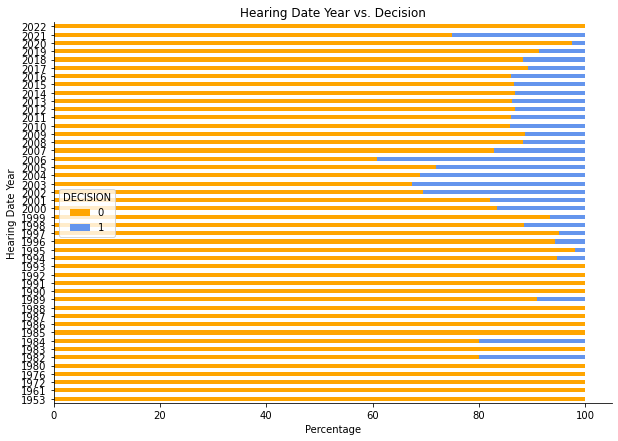

In [146]:
#plot the percentage of decision by absentia
HY_pct.unstack().plot(kind = 'barh', stacked=True, color=['orange', 'cornflowerblue'])
plt.title('Hearing Date Year vs. Decision')
plt.xlabel('Percentage')
plt.ylabel('Hearing Date Year')
sns.despine()
plt.show()

Note that due to 77 values, our graph doesn't look great however we can still get a visualization of the `HEARING_DATE_YEAR` vs. `DECISION`. Also note that we were unable to use the gray and red colors as it wasn't readable and hurt the eyes with too many horizontal bar lines therefore we used a different color. 

**0** indicates REJECTED and **1** indicates ACCEPTED. 

From the above graph we can see that there are certain years that have 100% rejection in the asylum cases. These could be the outliers. Again since we queried the data only for certain case types with an outcome, we got some years that only had 1 value (i.e. year 2022).

Great, now that we have extracted Year, Month and Day from `HEARING_DATE` column, we can drop it.

In [147]:
#drop HEARING_DATE
df_asylum3.drop(['HEARING_DATE'], axis=1, inplace=True)

In [148]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_CITY,ALIEN_STATE,CASE_DESCRIPTION,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,...,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,OMAHA,NE,Deportation,EL PASO,TX,Never Detained,No,...,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,PHILADELPHIA,PA,Released,No,...,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,ALBANIAN,PHILADELPHIA,PA,Asylum Only Case,PHILADELPHIA,PA,Released,No,...,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,PHILADELPHIA,PA,Released,No,...,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,ALBANIAN,UPPER DARBY,PA,Removal,PHILADELPHIA,PA,Released,No,...,40,6,11,2000,17,8,2001,26,2,2002


Next we will drop the `ALIEN_CITY` column.

**`ALIEN_CITY`**

As we mentioned earlier, since we have `ALIEN_STATE` available in our dataset, we can drop `ALIEN_CITY` to avoid high cardinality and collinearity between alien city and alien state. 

In [149]:
#drop ALIEN_CITY
df_asylum3.drop(['ALIEN_CITY'], axis=1, inplace=True)

In [150]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_STATE,CASE_DESCRIPTION,HEARING_CITY,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,...,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,NE,Deportation,EL PASO,TX,Never Detained,No,0,...,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,ALBANIAN,PA,Asylum Only Case,PHILADELPHIA,PA,Released,No,4,...,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,ALBANIAN,PA,Asylum Only Case,PHILADELPHIA,PA,Released,No,1,...,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,ALBANIAN,PA,Removal,PHILADELPHIA,PA,Released,No,2,...,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,ALBANIAN,PA,Removal,PHILADELPHIA,PA,Released,No,2,...,40,6,11,2000,17,8,2001,26,2,2002


Next, we will drop `HEARING_CITY`.

**`HEARING_CITY`**

Similar to `ALIEN_CITY`, since we have `HEARING_STATE` available in our dataset, we can drop `HEARING_CITY`. This will help us avoid collinearity between hearing city and hearing state in our independent variables / features. 

In [151]:
#drop HEARING_CITY
df_asylum3.drop(['HEARING_CITY'], axis=1, inplace=True)

In [152]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,LANGUAGES,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,...,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,AGUACATECO,NE,Deportation,TX,Never Detained,No,0,Yes,...,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,ALBANIAN,PA,Asylum Only Case,PA,Released,No,4,No,...,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,ALBANIAN,PA,Asylum Only Case,PA,Released,No,1,No,...,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,ALBANIAN,PA,Removal,PA,Released,No,2,No,...,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,ALBANIAN,PA,Removal,PA,Released,No,2,No,...,40,6,11,2000,17,8,2001,26,2,2002


Next we will drop `LANGUAGES` to avoid collinearity with `NATIONALITIES`.

**`LANGUAGES`**

In [153]:
#drop LANGUAGES
df_asylum3.drop(['LANGUAGES'], axis=1, inplace=True)

In [154]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,...,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,0,Yes,VJ2,...,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,4,No,CMH,...,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,1,No,CMH,...,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,...,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,...,40,6,11,2000,17,8,2001,26,2,2002


We have successfully dropped all the columns we did not want to encode for our modeling. 

Since we have also added to our columns, the code above isn't displaying all columns. Let's fix this.

In [155]:
#show all columns
pd.set_option('display.max_columns', None)
df_asylum3.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,0,Yes,VJ2,0,12,23,1,3,1994,21,7,1994,14,12,1994
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,4,No,CMH,0,11,34,8,12,2001,8,12,2001,19,3,2003
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,1,No,CMH,0,2,13,8,12,2001,8,12,2001,19,3,2003
3,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,1,6,43,6,11,2000,17,8,2001,13,1,2005
4,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,0,6,40,6,11,2000,17,8,2001,26,2,2002


In [156]:
#get dataset info
df_asylum3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482829 entries, 0 to 482843
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NATIONALITY          482829 non-null  object
 1   GENDER               482829 non-null  object
 2   ALIEN_STATE          482829 non-null  object
 3   CASE_DESCRIPTION     482829 non-null  object
 4   HEARING_STATE        482829 non-null  object
 5   CUSTODY              482829 non-null  object
 6   CRIMINAL_RECORD      482829 non-null  object
 7   ATTY_NBR             482829 non-null  int64 
 8   ABSENTIA             482829 non-null  object
 9   IJ_CODE              482829 non-null  object
 10  DECISION             482829 non-null  int64 
 11  BIRTHDATE_MONTH      482829 non-null  int64 
 12  AGE                  482829 non-null  int64 
 13  DATE_OF_ENTRY_DAY    482829 non-null  int64 
 14  DATE_OF_ENTRY_MONTH  482829 non-null  int64 
 15  DATE_OF_ENTRY_YEAR   482829 non-nu

We have converted all datetime columns to numeric columns. We still have **9** non-numeric / categorical columns that we need to preprocess prior to modeling. 

We will save this dataset as a csv incase we need to apply different preprocessing steps later in our process. 

In [157]:
#save dataframe output to use later - save to csv file
df_asylum3.to_csv('asylum_dataset_preprocessv2.csv', index=False)

Now that we have converted our datetime columns into numeric, we can look at the correlations between our numeric columns. 

Let's seperate our numeric and make a dataframe.

In [158]:
#seperate numeric columns
numeric_col_list2 = list(df_asylum3.select_dtypes('number').columns)
print(numeric_col_list2)

['ATTY_NBR', 'DECISION', 'BIRTHDATE_MONTH', 'AGE', 'DATE_OF_ENTRY_DAY', 'DATE_OF_ENTRY_MONTH', 'DATE_OF_ENTRY_YEAR', 'NOTICE_DATE_DAY', 'NOTICE_DATE_MONTH', 'NOTICE_DATE_YEAR', 'HEARING_DATE_DAY', 'HEARING_DATE_MONTH', 'HEARING_DATE_YEAR']


In [159]:
#create a new dataframe for numeric data
numeric = df_asylum3[numeric_col_list2].drop(columns='DECISION').copy()
numeric.head()

,ATTY_NBR,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,0,12,23,1,3,1994,21,7,1994,14,12,1994
1,4,11,34,8,12,2001,8,12,2001,19,3,2003
2,1,2,13,8,12,2001,8,12,2001,19,3,2003
3,2,6,43,6,11,2000,17,8,2001,13,1,2005
4,2,6,40,6,11,2000,17,8,2001,26,2,2002


Let's graph these numeric columns with a pairplot to look at their relationships and any correlations between them.

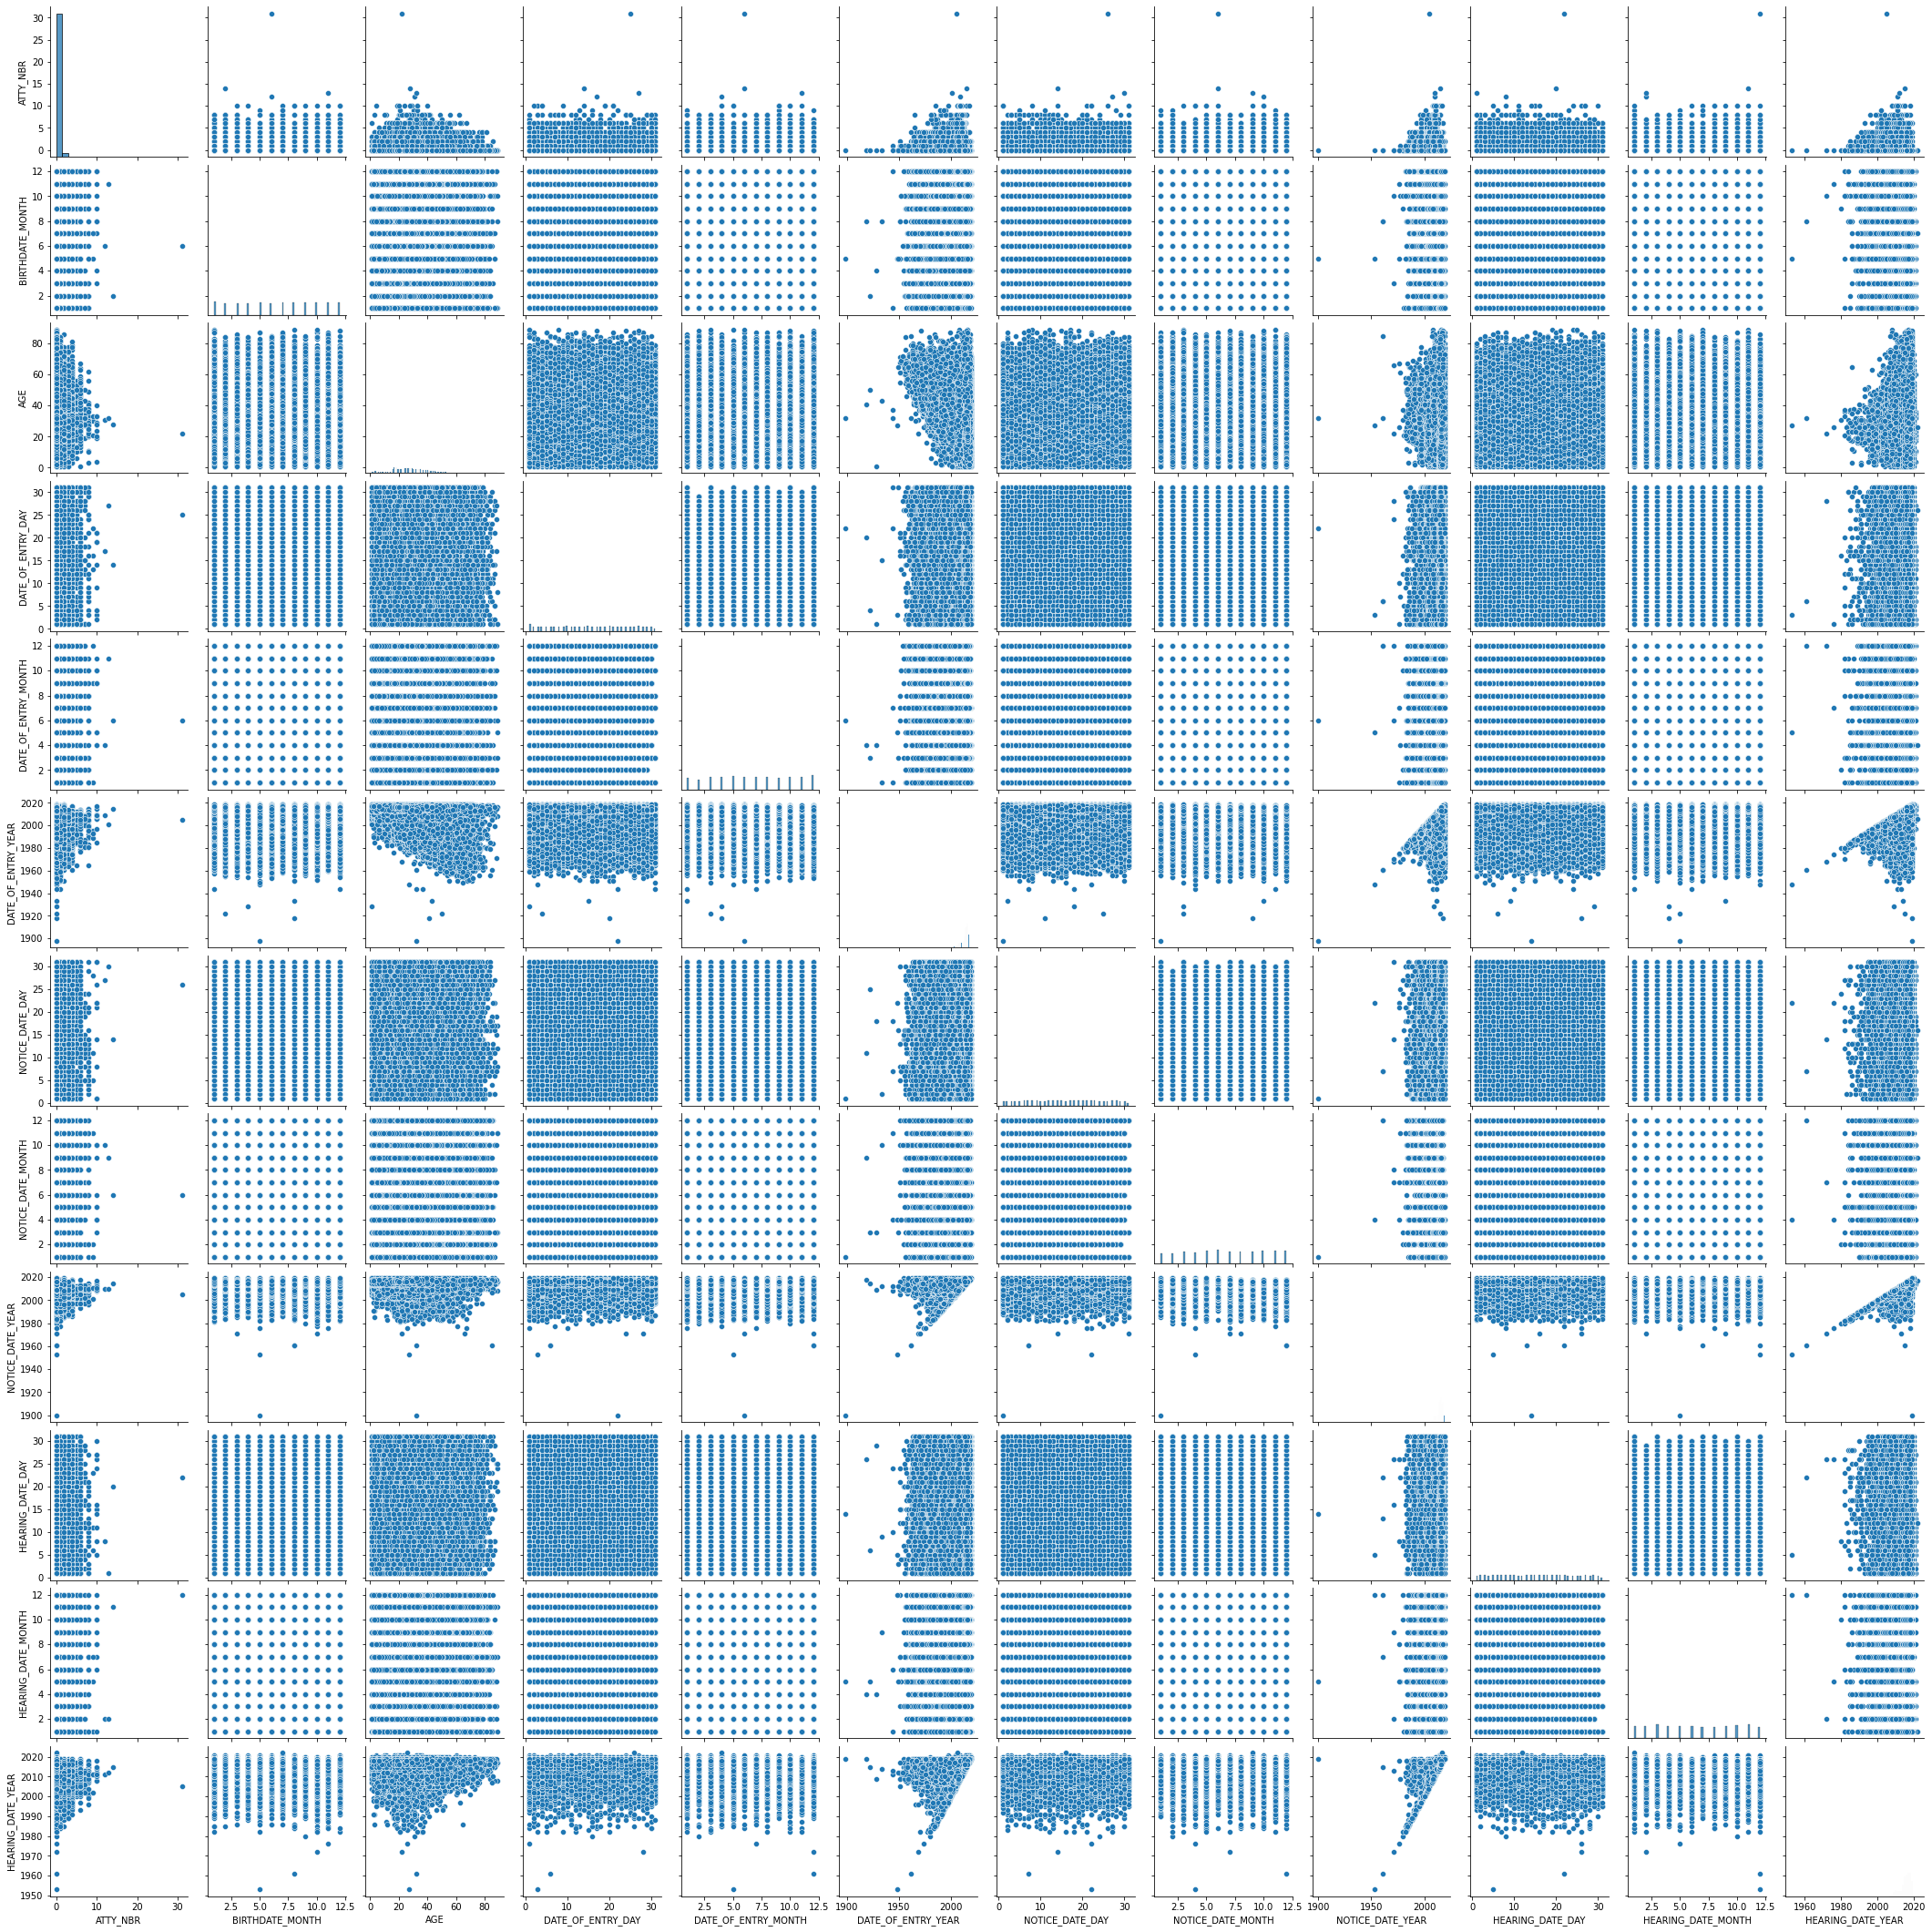

In [160]:
#graph numeric dataframe with pairplot
sns.pairplot(numeric)
plt.show()

The above graph is hard to read, however we can see that there is correlation between `NOTICE_DATE_YEAR` and `HEARING_DATE_YEAR`. Also there is correlation between `NOTICE_DATE_YEAR` and `DATE_OF_ENTRY_YEAR`.  We will also look at a heat map in the next steps to better understand these correlations. 

Let's look at the distribution of these numeric features next. 

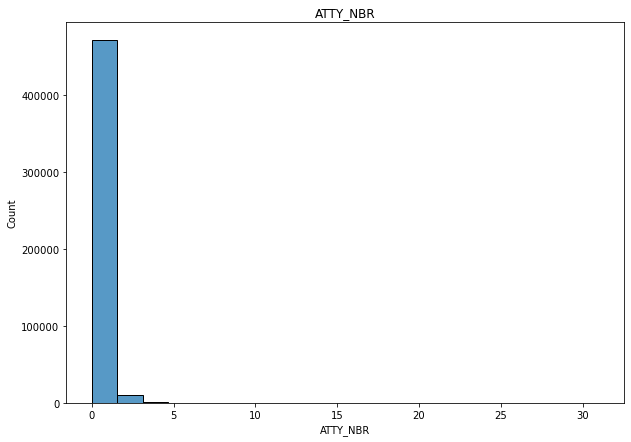

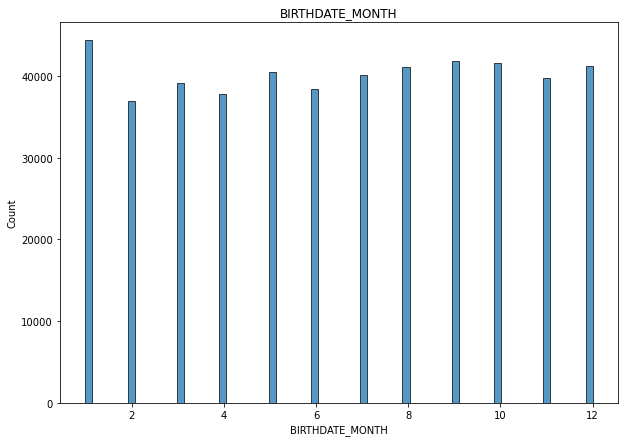

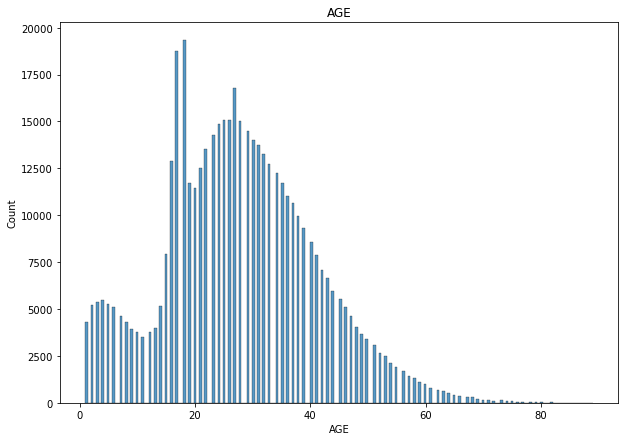

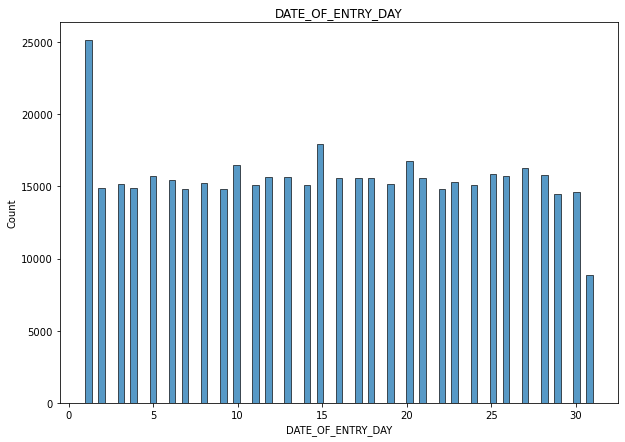

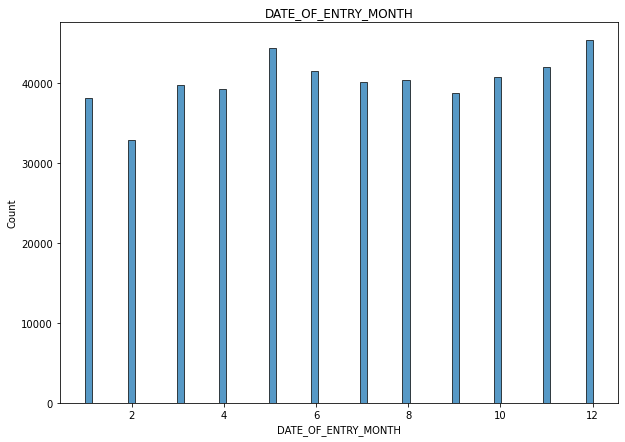

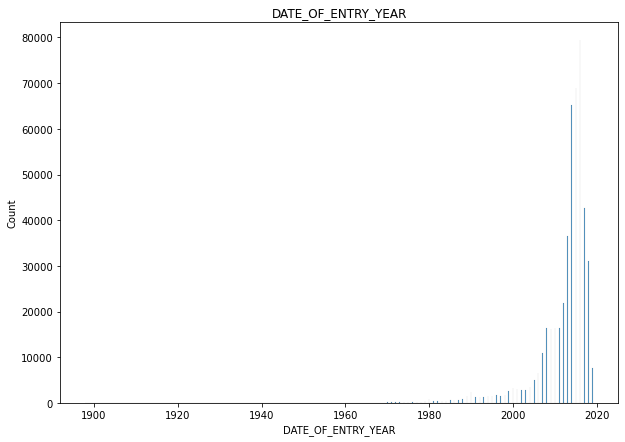

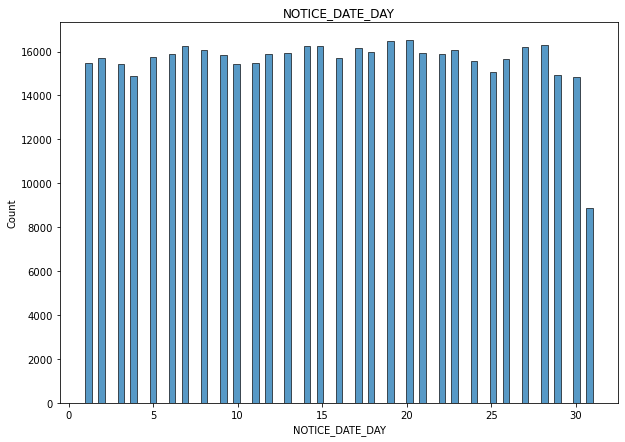

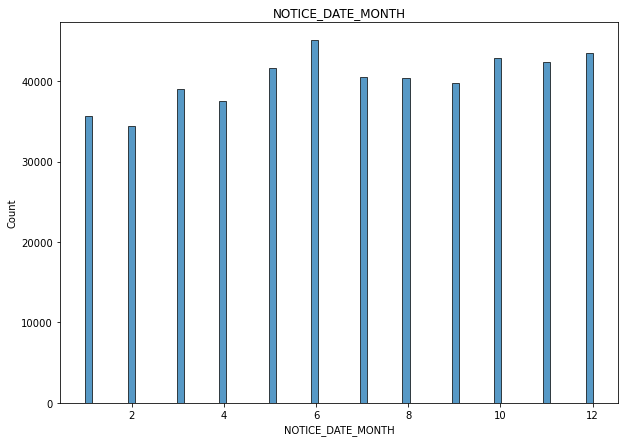

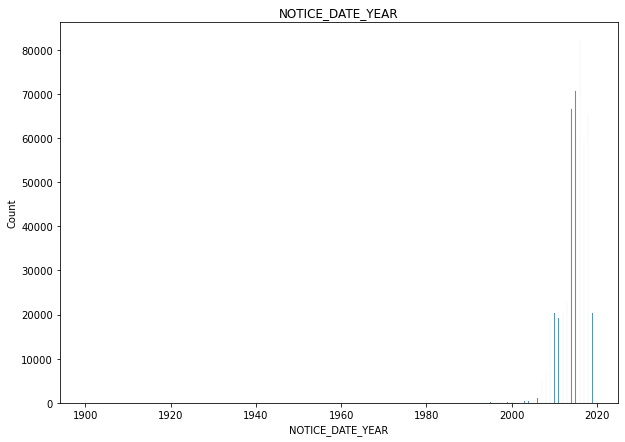

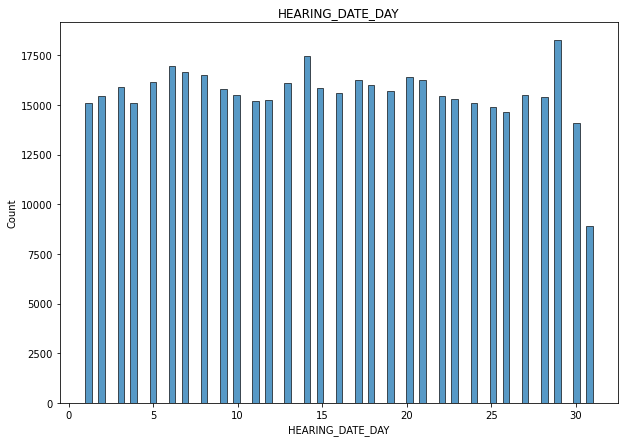

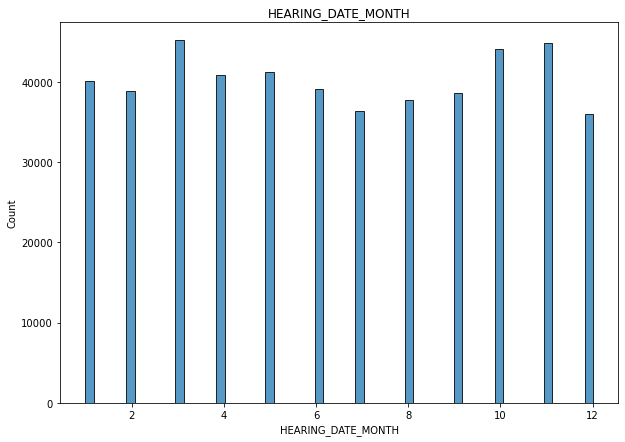

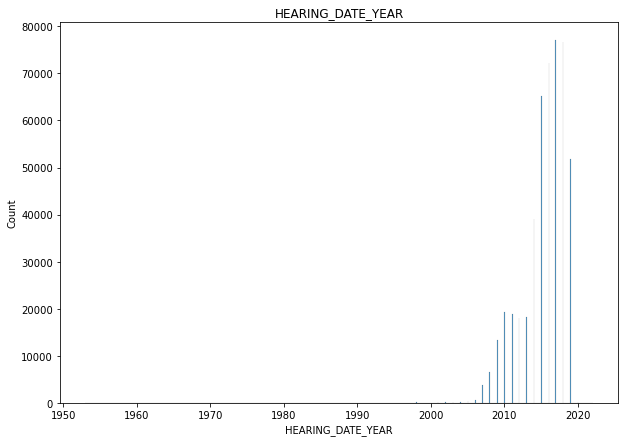

In [161]:
#graph the columns in the numeric dataframe
for column in numeric.columns:
    sns.histplot(x=column, data=numeric)
    plt.title(column)
    plt.show()

From the above visualizations we can see that `AGE` is slightly right skewed and the years for `HEARING_DATE` and `DATE_OF_ENTRY` and `NOTICE_DATE` are all left skewed. 

Let's look at the correlation table and heat map for these numeric values next to better understand our numeric dataset. 

In [162]:
#get correlation for numeric dataset
numeric.corr()

,ATTY_NBR,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,NOTICE_DATE_YEAR,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
ATTY_NBR,1.000000,-0.001065,0.093748,-0.010941,-0.012576,-0.269627,-0.001446,-0.017464,-0.374516,-0.003772,-0.005044,-0.351728
BIRTHDATE_MONTH,-0.001065,1.000000,-0.018246,0.000365,0.002425,0.000698,-0.002406,0.000220,0.002045,-0.001831,0.002525,0.002172
AGE,0.093748,-0.018246,1.000000,-0.018749,-0.035383,-0.314966,-0.009415,-0.045663,-0.072057,0.005230,-0.016855,-0.073776
DATE_OF_ENTRY_DAY,-0.010941,0.000365,-0.018749,1.000000,0.004107,0.043864,0.099149,-0.002716,0.031800,0.016396,-0.002948,0.033815
DATE_OF_ENTRY_MONTH,-0.012576,0.002425,-0.035383,0.004107,1.000000,-0.002229,-0.007656,0.144102,0.033471,-0.004485,-0.095389,0.056442
DATE_OF_ENTRY_YEAR,-0.269627,0.000698,-0.314966,0.043864,-0.002229,1.000000,0.006869,0.040558,0.558420,0.003612,0.001695,0.533771
NOTICE_DATE_DAY,-0.001446,-0.002406,-0.009415,0.099149,-0.007656,0.006869,1.000000,-0.016486,-0.006989,-0.036291,0.008798,-0.000340
NOTICE_DATE_MONTH,-0.017464,0.000220,-0.045663,-0.002716,0.144102,0.040558,-0.016486,1.000000,-0.055232,-0.004748,0.124143,0.029939
NOTICE_DATE_YEAR,-0.374516,0.002045,-0.072057,0.031800,0.033471,0.558420,-0.006989,-0.055232,1.000000,0.010116,-0.040226,0.925735
HEARING_DATE_DAY,-0.003772,-0.001831,0.005230,0.016396,-0.004485,0.003612,-0.036291,-0.004748,0.010116,1.000000,-0.012501,0.020078


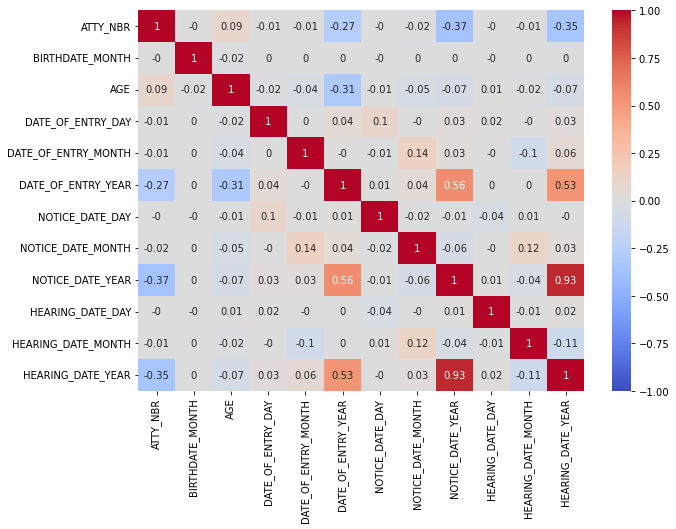

In [163]:
#heatmap for numeric dataset
sns.heatmap(numeric.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

Again we can see that there is correlation between `NOTICE_DATE_YEAR` and `HEARING_DATE_YEAR`. Also there is correlation between `NOTICE_DATE_YEAR` and `DATE_OF_ENTRY_YEAR`. We can drop `NOTICE_DATE_YEAR` feature as it can cause collinearity in our models specially the ones that are sensitive to collinearity such as Linear Classifiers (Logistic Regression Model).

In [164]:
#drop `NOTICE_DATE_YEAR` feature/column
df_asylum3.drop(['NOTICE_DATE_YEAR'], axis=1, inplace=True)

In [165]:
#sanity check
df_asylum3.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,0,Yes,VJ2,0,12,23,1,3,1994,21,7,14,12,1994
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,4,No,CMH,0,11,34,8,12,2001,8,12,19,3,2003
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,1,No,CMH,0,2,13,8,12,2001,8,12,19,3,2003
3,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,1,6,43,6,11,2000,17,8,13,1,2005
4,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,0,6,40,6,11,2000,17,8,26,2,2002


**`ATTY_NBR`**

We will convert `ATTY_NBR` form a numeric to categorical column called `ATTY_REP` and later on-hot encode. As we mentioned earlier in this notebook, this feature has extreme outliers and thinking ahead for scaling (i.e. Min-Max Scaler) and modeling, it can skew the values. 


We will set the value **No** meaning **no attorney representation** to the rows that have 0 as number of attorneys and set the value **Yes** meaning **attorney representation** to the rows that have 1 or higher number of attorneys. 

We could have done it in one step instead of setting to string values, however we will make it be a categorical column to later one-hot encode. 

Note that once one-hot encoded, one of the columns would be dropped to avoid multicollinearity. 

In [166]:
#convert ATTY_NBR column to a categorical column - 0 represensation is No and 1 or more representation is Yes
df_asylum3['ATTY_REP'] = np.where(df_asylum3['ATTY_NBR'] == 0, 'No', 'Yes')

In [167]:
#check data
df_asylum3.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ATTY_NBR,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,ATTY_REP
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,0,Yes,VJ2,0,12,23,1,3,1994,21,7,14,12,1994,No
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,4,No,CMH,0,11,34,8,12,2001,8,12,19,3,2003,Yes
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,1,No,CMH,0,2,13,8,12,2001,8,12,19,3,2003,Yes
3,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,1,6,43,6,11,2000,17,8,13,1,2005,Yes
4,ALBANIA,Female,PA,Removal,PA,Released,No,2,No,RPM,0,6,40,6,11,2000,17,8,26,2,2002,Yes


Great, now that we have our new column `ATTY_REP`, we can drop our `ATTY_NBR` column. 

In [168]:
#drop `ATTY_NBR` feature/column
df_asylum3.drop(['ATTY_NBR'], axis=1, inplace=True)

In [169]:
#sanity check
df_asylum3.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ABSENTIA,IJ_CODE,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,ATTY_REP
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,Yes,VJ2,0,12,23,1,3,1994,21,7,14,12,1994,No
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,No,CMH,0,11,34,8,12,2001,8,12,19,3,2003,Yes
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,No,CMH,0,2,13,8,12,2001,8,12,19,3,2003,Yes
3,ALBANIA,Female,PA,Removal,PA,Released,No,No,RPM,1,6,43,6,11,2000,17,8,13,1,2005,Yes
4,ALBANIA,Female,PA,Removal,PA,Released,No,No,RPM,0,6,40,6,11,2000,17,8,26,2,2002,Yes


We can confirm that the column has been dropped and all looks good for our next steps. 

In the next section we will convert these categorical columns to numeric columns using One-Hot Encoder. 

## One-Hot Encoding

In this section we will be converting our non-numeric / categorical columns into numeric column using One-Hot Encoding. 

It's important to note that One-Hot Encoding is done **AFTER TRAIN-TEST SPLIT**. That being said since our data is **100% static** and we are **ABSOLUTELY SURE** that we will not have any other categorical values added later on we can apply One-Hot Encoding prior to Train-Test split in this case. 

Note that best practice and for future projects is to apply **One-Hot Encoding AFTER Train-Test Split**.

We also need to note that some columns such as `NATIONALITY` and `IJ_CODE` have a lot of unique values within them and One-Hot Encoding all can lead to **high cardinality**. That being said, it is important to keep all values to see how different nationalities or Immigration Judges can influence outcome (predict outcome).  

We will be one-hot encoding our categorical columns. Also since we might be using linear models, we will drop the first value in our one-hot encoding to avoid multicollinearity. 

In circumstances with more time available, we should examine which one-hot encoded feature to drop. In this case since we have a lot of values, we will have one-hot encoder drop the first column for us. 

In [170]:
#list all categorical column (12 total columns)
categorical_cols = list(df_asylum3.select_dtypes('object').columns)
print(categorical_cols)

['NATIONALITY', 'GENDER', 'ALIEN_STATE', 'CASE_DESCRIPTION', 'HEARING_STATE', 'CUSTODY', 'CRIMINAL_RECORD', 'ABSENTIA', 'IJ_CODE', 'ATTY_REP']


In [171]:
#make dataframe with only categorical columns to one-hot encode
df_encode = df_asylum3[categorical_cols].copy()
df_encode.head()

,NATIONALITY,GENDER,ALIEN_STATE,CASE_DESCRIPTION,HEARING_STATE,CUSTODY,CRIMINAL_RECORD,ABSENTIA,IJ_CODE,ATTY_REP
0,GUATEMALA,Female,NE,Deportation,TX,Never Detained,No,Yes,VJ2,No
1,ALBANIA,Female,PA,Asylum Only Case,PA,Released,No,No,CMH,Yes
2,ALBANIA,Male,PA,Asylum Only Case,PA,Released,No,No,CMH,Yes
3,ALBANIA,Female,PA,Removal,PA,Released,No,No,RPM,Yes
4,ALBANIA,Female,PA,Removal,PA,Released,No,No,RPM,Yes


In [172]:
#get shape - making sure all 9 columns are there
df_encode.shape

(482829, 10)

In [173]:
#import one hot encoding library
from sklearn.preprocessing import OneHotEncoder

#instantiate one-hot encoder
ohe = OneHotEncoder(drop='first')

#fit and transform categorical dataframe
array_encoded = ohe.fit_transform(df_encode)
array_encoded

<482829x1026 sparse matrix of type '<class 'numpy.float64'>'
	with 3319726 stored elements in Compressed Sparse Row format>

Now that we have created a sparse matrix, we need to convert it to an array.

In [174]:
#convert from sparse matrix to dense
dense_array = array_encoded.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Let's check and get the corresponding column names. We need to use `get_feature_names_out()` in order to append the original column name to our encoded values.

In [175]:
#get corresponding column names
ohe.get_feature_names_out()

array(['NATIONALITY_ALBANIA', 'NATIONALITY_ALGERIA', 'NATIONALITY_ANGOLA',
       ..., 'IJ_CODE_cep', 'IJ_CODE_jlr', 'ATTY_REP_Yes'], dtype=object)

Next we need to convert the above array to a dataframe.

In [176]:
#get above column names into a dataframe
df_encoded = pd.DataFrame(dense_array, columns=ohe.get_feature_names_out(), dtype=int)

#check dataframe
df_encoded.head()

,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_SLOVENIA,NATIONALITY_SOLOMON ISLANDS,NATIONALITY_SOMALIA,NATIONALITY_SOUTH AFRICA,NATIONALITY_SOUTH KOREA,NATIONALITY_SOUTH SUDAN,NATIONALITY_SOVIET UNION,NATIONALITY

In [177]:
#check shape
df_encoded.shape

(482829, 1026)

Next we will get the numeric columns in a new dataframe to concatenate with the encoded dataframe.

In [178]:
#get all numeric columns to concat with the encoded dataframe
numeric_col = list(df_asylum3.select_dtypes('number').columns)
print(numeric_col)

['DECISION', 'BIRTHDATE_MONTH', 'AGE', 'DATE_OF_ENTRY_DAY', 'DATE_OF_ENTRY_MONTH', 'DATE_OF_ENTRY_YEAR', 'NOTICE_DATE_DAY', 'NOTICE_DATE_MONTH', 'HEARING_DATE_DAY', 'HEARING_DATE_MONTH', 'HEARING_DATE_YEAR']


In [179]:
#make dataframe with only numeric columns
df_numeric = df_asylum3[numeric_col].copy()
df_numeric.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,0,12,23,1,3,1994,21,7,14,12,1994
1,0,11,34,8,12,2001,8,12,19,3,2003
2,0,2,13,8,12,2001,8,12,19,3,2003
3,1,6,43,6,11,2000,17,8,13,1,2005
4,0,6,40,6,11,2000,17,8,26,2,2002


In [180]:
#check shape
df_numeric.shape

(482829, 11)

Before combining the two dataframes, let's reset the index to make sure index matches. 

In [181]:
#reset index for numeric dataframe
df_numeric = df_numeric.reset_index(drop=True)

In [182]:
#reset index for enconded dataframe
df_encoded = df_encoded.reset_index(drop=True)

In [183]:
#check numeric df
df_numeric.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR
0,0,12,23,1,3,1994,21,7,14,12,1994
1,0,11,34,8,12,2001,8,12,19,3,2003
2,0,2,13,8,12,2001,8,12,19,3,2003
3,1,6,43,6,11,2000,17,8,13,1,2005
4,0,6,40,6,11,2000,17,8,26,2,2002


In [184]:
#check encoded df
df_encoded.head()

,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_SLOVENIA,NATIONALITY_SOLOMON ISLANDS,NATIONALITY_SOMALIA,NATIONALITY_SOUTH AFRICA,NATIONALITY_SOUTH KOREA,NATIONALITY_SOUTH SUDAN,NATIONALITY_SOVIET UNION,NATIONALITY

Next we will append our numeric dataset with our encoded dataset to our final preprocessed data.

In [185]:
#append encoded dataframe with numeric dataframe
df_clean = pd.concat([df_numeric, df_encoded], axis=1)

In [186]:
#check data
df_clean.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATI

In [187]:
#check data shape
df_clean.shape

(482829, 1037)

Great, we have successfully finished preprocessing and have converted all our non-numeric columns to numeric. 

Our dataset is now ready for modeling. 

Let's save our cleaned dataframe to a csv file so we can use it in our next notebook for modeling. 

---

# Saving the Data

Now that we have our dataset ready for modelling, we are going to save it as a csv file as we will be using it in our next notebook. 

In [188]:
#save dataframe output to use later
df_clean.to_csv('asylum_dataset_modelv2.csv', index=False)

---

# Summary

In this notebook, we performed Advanced Exploratory Data Analysis and Data Wrangling / Preprocessing on our dataset to gain additional insight into our dataset and get our data ready for modeling. 

After importing in our data, as best practice we looked at missing values and duplicates. 

As part of additional data cleaning we:
- Dropped 1 duplicated row

We did an Advanced Exploratory Data Analysis and saw that:
- Males had a slightly lower acceptance rate than females
- Nationalities such as **Mexico**, **El Salvador**, **Guatemala**, **Honduras**, and **China** have the top acceptance rate. This could be unrelated to nationality and due to the fact that there are more case applicants from these countries compared to others.  
- Applicants with a criminal record had a higher acceptance rate at **15%** vs. those with no criminal record at **9%**. 
- Didn't see a significant difference in decision outcome based on custody status (detained, never detained, released)
- Some Immigration Judges had a rejection rate of 100% on the cases they oversaw
- Whether applicants were absent or present made a difference in the decision outcome as those who were absent at their asylum case hearing, 99.92%got rejected vs. those who were present at their hearings, 81% got rejected. 
- **Montana** had the highest acceptance rate followed by Hawaii and Alaska. This could be due to the fact that not a lot of applicants are in or near those states. 
- Cases without attorney representation had a higher rejection rate than those with representation.

In our Data Wrangling section we:
- Converted our **target** column of `DECISION` to a binary column. 
    - **ACCEPTED** is now mapped to **1** and **REJECTED** is now mapped to **0**
- Converted all datetime columns of `DATE_OF_ENTRY`, `NOTICE_DATE`, and `HEARING_DATE` to numeric column. 
- Feature engineered `BIRTHDATE` column to `AGE` and extracted Year and Month to make 2 new columns. 
- One-Hot Encoded all other non-numeric columns

This concludes our Advanced Exploratory Data Analysis and Data Wrangling notebook. In the next notebook (**notebook 3**) we will start modeling and evaluating our models. 

---